## Official Setup

In [1]:
import xgboost

In [2]:
%env PATH=/home/jdkent/.conda/envs/comfy_pants/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/conda/bin


env: PATH=/home/jdkent/.conda/envs/comfy_pants/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/conda/bin


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, label_binarize, PolynomialFeatures

In [3]:
DATA_PATH = '../data/BipolarDerivedDataTraining.csv'
NTHREADS = 32

In [5]:
bp_df = pd.read_csv(DATA_PATH)

In [6]:
# selected_df = bp_df.filter(regex=("age$|gender|handedness|31p.*[^r]$|t1r.*_m|alff.*_m|allvol|dti"))
selected_df = bp_df.filter(regex=("31p.*[^r]$|t1r.*_m|alff.*_m|allvol|dti"))

In [29]:
best_mod_df = bp_df.filter(
    regex=("t1r.*cbm.*_m|t1r.*cc.*_m|t1r.*wm_.*_m|dti.*lob.*|dti.*crus.*|dti.*vermis.*|dti.*vii.*|dti.*cc.*")).replace({0.: np.nan})

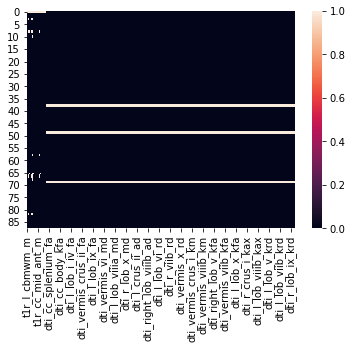

In [30]:
sns.heatmap(best_mod_df.isna())

In [31]:
best_mod_df.columns

Index(['t1r_l_cbmwm_m', 't1r_l_cbmctx_m', 't1r_laccumbarea_m', 't1r_r_cbmwm_m',
       't1r_r_cbmctx_m', 't1r_raccumbarea_m', 't1r_opticchiasm_m',
       't1r_cc_post_m', 't1r_cc_mid_post_m', 't1r_cc_mid_post_nv',
       ...
       'dti_r_viiia_krd', 'dti_l_lob_viiib_krd', 'dti_vermis_viiib_krd',
       'dti_right_lob_viiib_krd', 'dti_l_lob_ix_krd', 'dti_vermis_ix_krd',
       'dti_r_lob_ix_krd', 'dti_l_lob_x_krd', 'dti_vermis_x_krd',
       'dti_r_lob_x_krd'],
      dtype='object', length=268)

In [342]:
group = label_binarize(bp_df['group'], classes=["Case", "Control"]).squeeze()
extra_info = bp_df[['madrs_score', 'ymrs_score', 'suicideideation_rating_mostsevere_life']].values

In [343]:
display(group)
display(bp_df['group'].values)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

array(['Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case',
       'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case',
       'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case',
       'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case',
       'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case',
       'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case',
       'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case', 'Case',
       'Case', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control', 'Control', 'Control', 'Control', 'Control',
       'Control', 'Control'], dtype=object)

In [9]:
# stratify makes sure the number of group
X_train, X_test, y_train_all, y_test_all = train_test_split(
    selected_df, group, test_size=10, stratify=group)

In [10]:
y_train = y_train_all[:,0]
extra_info_train = y_train_all[:,1:]
y_test = y_test_all[:,0]

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

## Playground

In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA, KernelPCA, DictionaryLearning, FactorAnalysis, FastICA, SparsePCA
from sklearn.cross_decomposition import CCA, PLSSVD, PLSCanonical, PLSRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import (
    PowerTransformer, StandardScaler, PolynomialFeatures,
    FunctionTransformer, OneHotEncoder, LabelBinarizer,
    label_binarize, scale, QuantileTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE, RFECV, mutual_info_classif, f_classif
from statsmodels.stats.diagnostic import kstest_normal, normal_ad
from sklearn.svm import SVC, LinearSVC
from sklearn.manifold import TSNE
from sklearn.cluster import FeatureAgglomeration
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Normalize
from itertools import product

## How to Tune/Test your Model

In [345]:
fix_outliers = QuantileTransformer(output_distribution='normal')

imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50,
                           random_state=42)

scaler = StandardScaler()
kbest = SelectKBest(k=1000)

svc = LinearSVC(max_iter=100000, random_state=42, class_weight="balanced")
C_opts = [1, 10]

grid_params = [
    {
        "kittens__C": C_opts,
        "kittens__dual": [True]
    }
]

pipelineM = Pipeline([("outliers", fix_outliers),
                      ("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("kittens", svc)])

search = GridSearchCV(
    pipelineM, n_jobs=NTHREADS, param_grid=grid_params, 
    cv=10, scoring='roc_auc', error_score='raise', return_train_score=True, refit=True, verbose=2)

search.fit(X_train, y_train)

cv_df = pd.DataFrame(search.cv_results_)
cv_df.head()

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  12 out of  20 | elapsed:  1.7min remaining:  1.1min
[Parallel(n_jobs=32)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (78). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kittens__C,param_kittens__dual,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,73.019943,0.790654,8.87305,2.823183,1,True,"{'kittens__C': 1, 'kittens__dual': True}",0.666667,0.666667,0.6,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,73.253695,0.798605,8.89946,2.798799,10,True,"{'kittens__C': 10, 'kittens__dual': True}",0.666667,0.666667,0.6,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [359]:
search.score(X_test, y_test)

0.6666666666666667

In [355]:
query_list = ['(split{}_test_score > 0.15)'.format(idx) for idx in range(10)]
query = '&'.join(query_list)
query

'(split0_test_score > 0.15)&(split1_test_score > 0.15)&(split2_test_score > 0.15)&(split3_test_score > 0.15)&(split4_test_score > 0.15)&(split5_test_score > 0.15)&(split6_test_score > 0.15)&(split7_test_score > 0.15)&(split8_test_score > 0.15)&(split9_test_score > 0.15)'

In [358]:
cv_df.query(query).loc[:,"param_kittens__C":"rank_test_score"]

,param_kittens__C,param_kittens__dual,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1,True,"{'kittens__C': 1, 'kittens__dual': True}",0.666667,0.666667,0.6,0.6,0.6,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.17127,1
1,10,True,"{'kittens__C': 10, 'kittens__dual': True}",0.666667,0.666667,0.6,0.6,0.6,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.17127,1


In [39]:
# ignore residuals
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(k=500)
pca = PCA(whiten=True)
n_comp_opts = [2, 3, 5]
poly = PolynomialFeatures(include_bias=False, interaction_only=True)
dummy = FunctionTransformer()
clf = xgboost.XGBClassifier(subsample=0.7, n_estimators=500)
max_depth_opts = [3, 5, 10]
learning_rate_opts = [0.01, 0.1, 0.5]
scale_pos_weight_opts = [2, 4]
gamma_opts = [0.5, 3]
min_child_weight_opts = [3, 5]
max_delta_step_opts = [3, 7]
lambda_opts = [2, 5]
alpha_opts = [1, 3]

grid_params = [
    {
        'pca__n_components': n_comp_opts,
        'pca__whiten': whiten_opts,
        'poly': [dummy, poly],
        'clf__max_depth': max_depth_opts,
        'clf__learning_rate': learning_rate_opts,
        'clf__scale_pos_weight': scale_pos_weight_opts,
        'clf__gamma': gamma_opts,
        'clf__min_child_weight': min_child_weight_opts,
        'clf__max_delta_step': max_delta_step_opts,
        'clf__lambda': lambda_opts,
        'clf__alpha': alpha_opts,
    }
]
pipelineM = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("poly", poly),
                      ("pca", pca),
                      ("clf", clf)])
# pipelineM.fit(X_train, y_train)
# pipelineM.score(X_test, y_test)
search = GridSearchCV(pipelineM, n_jobs=NTHREADS, param_grid=grid_params, cv=10, scoring='roc_auc', verbose=2)
search.fit(X_train, y_train)
search.score(X_test, y_test)

Fitting 10 folds for each of 6912 candidates, totalling 69120 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:  3.5min
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:  9.1min
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed: 17.3min
[Parallel(n_jobs=32)]: Done 949 tasks      | elapsed: 27.5min
[Parallel(n_jobs=32)]: Done 1394 tasks      | elapsed: 40.1min
[Parallel(n_jobs=32)]: Done 1921 tasks      | elapsed: 55.3min
[Parallel(n_jobs=32)]: Done 2528 tasks      | elapsed: 72.8min
[Parallel(n_jobs=32)]: Done 3217 tasks      | elapsed: 92.4min
[Parallel(n_jobs=32)]: Done 3986 tasks      | elapsed: 114.6min
[Parallel(n_jobs=32)]: Done 4837 tasks      | elapsed: 138.7min
[Parallel(n_jobs=32)]: Done 5768 tasks      | elapsed: 165.6min
[Parallel(n_jobs=32)]: Done 6781 tasks      | elapsed: 194.5min
[Parallel(n_jobs=32)]: Done 7874 tasks      | elapsed: 225.9min
[Parallel(n_jobs=32)]: Done 9049 tasks      | elapsed: 258.9min
[Parallel(n_jobs=32)]: Done 10304 tasks

0.5416666666666667

In [40]:
res_df = pd.DataFrame(search.cv_results_)

In [41]:
res_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_clf__gamma,param_clf__lambda,param_clf__learning_rate,param_clf__max_delta_step,param_clf__max_depth,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,49.257251,2.611500,4.761478,1.412277,1,0.5,2,0.01,3,3,...,0.400000,0.800000,0.466667,0.600000,0.800000,0.7,0.6,0.683333,0.162788,410
1,49.636347,2.567339,4.803027,1.416206,1,0.5,2,0.01,3,3,...,0.066667,0.666667,0.833333,0.200000,0.466667,0.8,0.6,0.440000,0.263228,5991
2,49.377423,2.756836,4.783385,1.424721,1,0.5,2,0.01,3,3,...,0.600000,0.733333,0.400000,0.600000,0.866667,0.6,0.3,0.610000,0.204423,2829
3,49.086936,2.936776,4.810776,1.389861,1,0.5,2,0.01,3,3,...,0.266667,0.733333,0.566667,0.333333,0.533333,0.6,0.4,0.440000,0.157621,5979
4,48.556613,2.659269,4.785386,1.397731,1,0.5,2,0.01,3,3,...,0.466667,0.666667,0.266667,0.600000,0.600000,0.7,0.6,0.626667,0.157621,2275


In [42]:
search.best_params_

{'clf__alpha': 1,
 'clf__gamma': 3,
 'clf__lambda': 2,
 'clf__learning_rate': 0.5,
 'clf__max_delta_step': 7,
 'clf__max_depth': 3,
 'clf__min_child_weight': 5,
 'clf__scale_pos_weight': 4,
 'pca__n_components': 2,
 'pca__whiten': False,
 'poly': FunctionTransformer(accept_sparse=False, check_inverse=True, func=None,
                     inv_kw_args=None, inverse_func=None, kw_args=None,
                     validate=False)}

In [60]:
query_list = ['(split{}_test_score > 0.60)'.format(idx) for idx in range(10)]
query = '&'.join(query_list)
query

'(split0_test_score > 0.60)&(split1_test_score > 0.60)&(split2_test_score > 0.60)&(split3_test_score > 0.60)&(split4_test_score > 0.60)&(split5_test_score > 0.60)&(split6_test_score > 0.60)&(split7_test_score > 0.60)&(split8_test_score > 0.60)&(split9_test_score > 0.60)'

In [61]:
res_df.query(query).loc[:,'param_clf__alpha':'params']

,param_clf__alpha,param_clf__gamma,param_clf__lambda,param_clf__learning_rate,param_clf__max_delta_step,param_clf__max_depth,param_clf__min_child_weight,param_clf__scale_pos_weight,param_pca__n_components,param_pca__whiten,param_poly,params
6158,3,3,5,0.01,3,10,3,4,2,False,"FunctionTransformer(accept_sparse=False, check...","{'clf__alpha': 3, 'clf__gamma': 3, 'clf__lambd..."


In [105]:
from sklearn.utils.validation import check_is_fitted, FLOAT_DTYPES
from sklearn.utils import check_array
class PLSRegressionPatch(PLSRegression):
    def transform(self, X, Y=None, copy=True):
        """Apply the dimension reduction learned on the train data.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Training vectors, where n_samples is the number of samples and
            n_features is the number of predictors.
        Y : array-like of shape (n_samples, n_targets)
            Target vectors, where n_samples is the number of samples and
            n_targets is the number of response variables.
        copy : boolean, default True
            Whether to copy X and Y, or perform in-place normalization.
        Returns
        -------
        x_scores
        """
        check_is_fitted(self)
        X = check_array(X, copy=copy, dtype=FLOAT_DTYPES)
        # Normalize
        X -= self.x_mean_
        X /= self.x_std_
        # Apply rotation
        x_scores = np.dot(X, self.x_rotations_)

        return x_scores

In [175]:
# ignore residuals

fix_outliers = QuantileTransformer(output_distribution='normal')

imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()

kbest = SelectKBest(k=1000)

pca = PCA(whiten=True)
n_component_opts = [20, 30, 50]

selector = SVC(kernel='linear', class_weight="balanced", cache_size=10000)

rfe = RFE(selector)
n_features_to_select_opts = [3, 5, 10, 20]

clf = SVC(class_weight="balanced", cache_size=10000)

grid_params = [
    {
        "pca__n_components": n_component_opts,
        "rfe__n_features_to_select": n_features_to_select_opts,
    }
]

pipelineN = Pipeline([("outlier", fix_outliers),
                      ("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("pca", pca),
                      ("rfe", rfe),
                      ("clf", clf)])

searchN = GridSearchCV(pipelineN, n_jobs=NTHREADS, param_grid=grid_params, 
                      cv=10, scoring='roc_auc', return_train_score=True, refit=True, verbose=2)
searchN.fit(X_train, y_train)
cv_dfN = pd.DataFrame(searchN.cv_results_)
cv_dfN

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 118 out of 120 | elapsed:  6.8min remaining:    6.9s
[Parallel(n_jobs=32)]: Done 120 out of 120 | elapsed:  6.9min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (78). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_rfe__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,74.722818,1.181262,9.109651,2.796960,20,3,"{'pca__n_components': 20, 'rfe__n_features_to_...",0.600000,0.400000,0.666667,...,0.891304,0.913949,0.928442,0.874094,0.883152,0.835556,0.906087,0.900870,0.895954,0.027727
1,74.393301,0.582350,9.061412,2.749838,20,5,"{'pca__n_components': 20, 'rfe__n_features_to_...",1.000000,0.733333,0.800000,...,0.964674,0.971014,0.958333,0.935688,0.940217,0.943111,0.903478,0.975652,0.950884,0.020650
2,74.945607,1.926212,9.150441,2.969922,20,10,"{'pca__n_components': 20, 'rfe__n_features_to_...",0.466667,0.133333,0.666667,...,0.982790,0.978261,0.987319,0.985507,0.998188,0.989333,0.975652,0.993913,0.984567,0.008757
3,74.791852,0.979241,9.193043,2.779463,20,20,"{'pca__n_components': 20, 'rfe__n_features_to_...",0.600000,0.466667,0.733333,...,0.986413,0.978261,0.997283,0.994565,0.995471,0.993778,0.993913,0.997391,0.990175,0.008949
4,75.182175,0.635318,9.160471,2.806414,30,3,"{'pca__n_components': 30, 'rfe__n_features_to_...",0.400000,0.733333,0.800000,...,0.889493,0.870471,0.940217,0.872283,0.897645,0.872889,0.813913,0.916522,0.880713,0.034133
5,75.874876,1.125817,9.339184,2.930225,30,5,"{'pca__n_components': 30, 'rfe__n_features_to_...",0.733333,0.733333,0.666667,...,0.956522,0.979167,0.965580,0.889493,0.934783,0.922667,0.949565,0.967826,0.944422,0.025360
6,74.789283,1.151584,9.199325,2.814991,30,10,"{'pca__n_components': 30, 'rfe__n_features_to_...",0.800000,0.466667,0.733333,...,0.980978,0.994565,1.000000,0.993659,0.997283,0.994667,0.989565,0.997391,0.994539,0.005406
7,74.161405,0.942984,9.071088,2.786890,30,20,"{'pca__n_components': 30, 'rfe__n_features_to_...",0.666667,0.600000,0.866667,...,0.998188,1.000000,1.000000,0.996377,1.000000,0.999111,0.997391,1.000000,0.998563,0.001406
8,75.145079,1.630866,9.195444,2.793428,50,3,"{'pca__n_components': 50, 'rfe__n_features_to_...",0.266667,0.600000,0.800000,...,0.918478,0.886775,0.889493,0.887681,0.888587,0.888000,0.892174,0.912174,0.888528,0.022243
9,73.958490,1.278466,9.102170,2.750459,50,5,"{'pca__n_components': 50, 'rfe__n_features_to_...",0.733333,0.600000,0.800000,...,0.953804,0.961957,0.943841,0.914855,0.901268,0.966222,0.939130,0.979130,0.941166,0.025256


In [176]:
cv_dfN.loc[:,"param_pca__n_components":"rank_test_score"]

,param_pca__n_components,param_rfe__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,20,3,"{'pca__n_components': 20, 'rfe__n_features_to_...",0.600000,0.400000,0.666667,0.533333,0.200000,0.666667,0.533333,0.500000,0.7,0.5,0.530000,0.140989,11
1,20,5,"{'pca__n_components': 20, 'rfe__n_features_to_...",1.000000,0.733333,0.800000,0.733333,0.533333,0.533333,0.800000,0.583333,0.4,0.6,0.671667,0.165336,2
2,20,10,"{'pca__n_components': 20, 'rfe__n_features_to_...",0.466667,0.133333,0.666667,0.666667,0.266667,0.666667,0.666667,0.500000,0.5,0.5,0.503333,0.173494,12
3,20,20,"{'pca__n_components': 20, 'rfe__n_features_to_...",0.600000,0.466667,0.733333,0.600000,0.200000,0.800000,0.466667,0.666667,0.3,0.7,0.553333,0.183303,10
4,30,3,"{'pca__n_components': 30, 'rfe__n_features_to_...",0.400000,0.733333,0.800000,0.400000,0.400000,0.666667,0.533333,0.583333,0.6,0.7,0.581667,0.139134,9
5,30,5,"{'pca__n_components': 30, 'rfe__n_features_to_...",0.733333,0.733333,0.666667,0.600000,0.133333,0.800000,0.466667,0.583333,0.5,0.6,0.581667,0.179575,8
6,30,10,"{'pca__n_components': 30, 'rfe__n_features_to_...",0.800000,0.466667,0.733333,0.733333,0.466667,0.866667,0.666667,1.000000,0.6,0.6,0.693333,0.161107,1
7,30,20,"{'pca__n_components': 30, 'rfe__n_features_to_...",0.666667,0.600000,0.866667,0.733333,0.533333,0.800000,0.533333,0.833333,0.4,0.7,0.666667,0.142205,3
8,50,3,"{'pca__n_components': 50, 'rfe__n_features_to_...",0.266667,0.600000,0.800000,0.666667,0.200000,0.533333,1.000000,0.750000,1.0,0.6,0.641667,0.253996,5
9,50,5,"{'pca__n_components': 50, 'rfe__n_features_to_...",0.733333,0.600000,0.800000,0.666667,0.733333,0.466667,0.400000,0.666667,1.0,0.6,0.666667,0.160555,4


In [182]:
query_list = ['(split{}_test_score > 0.0)'.format(idx) for idx in range(10)]
query = '&'.join(query_list)
query

'(split0_test_score > 0.0)&(split1_test_score > 0.0)&(split2_test_score > 0.0)&(split3_test_score > 0.0)&(split4_test_score > 0.0)&(split5_test_score > 0.0)&(split6_test_score > 0.0)&(split7_test_score > 0.0)&(split8_test_score > 0.0)&(split9_test_score > 0.0)'

In [184]:
# k = 1000
# n_components = 30 (pca)
# features = 5
cv_dfN.query(query).loc[:,["param_pca__n_components", 'param_rfe__n_features_to_select', "mean_test_score", "rank_test_score"]].groupby(['param_rfe__n_features_to_select', "param_pca__n_components"]).describe()

mean_test_score  \
                                                                  count   
param_rfe__n_features_to_select param_pca__n_components                   
3                               20                                  1.0   
                                30                                  1.0   
                                50                                  1.0   
5                               20                                  1.0   
                                30                                  1.0   
                                50                                  1.0   
10                              20                                  1.0   
                                30                                  1.0   
                                50                                  1.0   
20                              20                                  1.0   
                                30                                  1.0   
                                50                                  1.0   

                                                                       \
                                                             mean std   
param_rfe__n_features_to_select param_pca__n_components                 
3                               20                       0.530000 NaN   
                                30                       0.581667 NaN   
                                50                       0.641667 NaN   
5                               20                       0.671667 NaN   
                                30                       0.581667 NaN   
                                50                       0.666667 NaN   
10                              20                       0.503333 NaN   
                                30                       0.693333 NaN   
                                50                       0.613333 NaN   
20                              20                       0.553333 NaN   
                                30                       0.666667 NaN   
                                50                       0.625000 NaN   

                                                                             \
                                                              min       25%   
param_rfe__n_features_to_select param_pca__n_components                       
3                               20                       0.530000  0.530000   
                                30                       0.581667  0.581667   
                                50                       0.641667  0.641667   
5                               20                       0.671667  0.671667   
                                30                       0.581667  0.581667   
                                50                       0.666667  0.666667   
10                              20                       0.503333  0.503333   
                                30                       0.693333  0.693333   
                                50                       0.613333  0.613333   
20                              20                       0.553333  0.553333   
                                30                       0.666667  0.666667   
                                50                       0.625000  0.625000   

                                                                             \
                                                              50%       75%   
param_rfe__n_features_to_select param_pca__n_components                       
3                               20                       0.530000  0.530000   
                                30                       0.581667  0.581667   
                                50                       0.641667  0.641667   
5                               20                       0.671667  0.671667   
                                30                       0.581667  0.581667   
                

In [308]:
fix_outliers = QuantileTransformer(output_distribution='normal')

imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(k=1000)
pca = PCA(n_components=30, whiten=True)
selector = LinearSVC(class_weight="balanced", max_iter=100000)

rfe = RFE(selector, n_features_to_select=10)

clf = LinearSVC(class_weight="balanced", max_iter=100000)
C_opts = np.logspace(-2, 10, 13)
penalty_opts = ['l1', 'l2']
dual_opts = [False, True]

grid_params = [{"clf__C": [c], "clf__penalty": [p],
                "clf__dual": [d],
                "rfe__estimator__C": [c],
                "rfe__estimator__penalty": [p],
                "rfe__estimator__dual": [d],
                 } for c, (p, d) in product(C_opts, zip(penalty_opts, dual_opts))]

pipelineN = Pipeline([("outliers", fix_outliers),
                      ("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("pca", pca),
                      ("rfe", rfe),
                      ("clf", clf)])

searchN = GridSearchCV(pipelineN, n_jobs=NTHREADS, param_grid=grid_params, 
                      cv=10, scoring='roc_auc', return_train_score=True, refit=True, verbose=2)
searchN.fit(X_train, y_train)
cv_dfN = pd.DataFrame(searchN.cv_results_)

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 260 out of 260 | elapsed: 15.1min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (78). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/svm/_base.p

In [309]:
searchN.best_params_

{'clf__C': 100000.0,
 'clf__dual': True,
 'clf__penalty': 'l2',
 'rfe__estimator__C': 100000.0,
 'rfe__estimator__dual': True,
 'rfe__estimator__penalty': 'l2'}

In [312]:
searchN.best_score_

0.7583333333333333

In [313]:
searchN.best_index_

15

In [310]:
searchN.best_estimator_.predict(X_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [311]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [314]:
cv_dfN.iloc[15,:]

mean_fit_time                                                              75.6797
std_fit_time                                                              0.920301
mean_score_time                                                            9.08987
std_score_time                                                              2.7377
param_clf__C                                                                100000
param_clf__dual                                                               True
param_clf__penalty                                                              l2
param_rfe__estimator__C                                                     100000
param_rfe__estimator__dual                                                    True
param_rfe__estimator__penalty                                                   l2
params                           {'clf__C': 100000.0, 'clf__dual': True, 'clf__...
split0_test_score                                                              0.6
spli

In [277]:
query_list = ['(split{}_test_score >= 0.35)'.format(idx) for idx in range(10)]
query = '&'.join(query_list)
query

'(split0_test_score >= 0.35)&(split1_test_score >= 0.35)&(split2_test_score >= 0.35)&(split3_test_score >= 0.35)&(split4_test_score >= 0.35)&(split5_test_score >= 0.35)&(split6_test_score >= 0.35)&(split7_test_score >= 0.35)&(split8_test_score >= 0.35)&(split9_test_score >= 0.35)'

In [278]:
# k = 10000
# n_components = 30 (pca)
# features = 10
# gamma = 0.001
# C = 10000
cv_dfN.query(query).loc[:,"param_clf__C":"rank_test_score"]

,param_clf__C,param_clf__penalty,param_rfe__estimator__C,param_rfe__estimator__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
23,1e+09,l2,1e+09,l2,"{'clf__C': 1000000000.0, 'clf__penalty': 'l2',...",0.533333,0.733333,0.733333,0.533333,0.6,0.666667,0.4,0.833333,0.6,0.6,0.623333,0.117426,6


In [207]:
fix_outliers = QuantileTransformer(output_distribution='normal')

imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(k=1000)
pca = PCA(n_components=30, whiten=True)
selector = SVC(random_state=42, kernel='linear', C=10000, gamma=0.001,
               class_weight="balanced", cache_size=10000)

rfe = RFE(selector, n_features_to_select=10)

clf = SVC(random_state=42, C=10000, gamma=0.001,
          class_weight="balanced", cache_size=10000)

pipelineA = Pipeline([("outliers", fix_outliers),
                      ("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("pca", pca),
                      ("rfe", rfe),
                      ("clf", clf)])


pipelineA.fit(X_train, y_train)
display(pipelineA.score(X_test, y_test))
display(pipelineA.predict(X_test))
display(y_test)

/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (78). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


0.7

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0])

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [315]:
fix_outliers = QuantileTransformer(output_distribution='normal')

imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50,
                           random_state=42)

scaler = StandardScaler()
kbest = SelectKBest(k=1000)
svc = LinearSVC(max_iter=100000, random_state=42, class_weight="balanced")
C_opts = np.logspace(-2, 10, 13)

grid_params = [
    {
        "svc__C": C_opts,
    }
]

pipelineM = Pipeline([("outliers", fix_outliers),
                      ("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("svc", svc)])

search = GridSearchCV(pipelineM, n_jobs=NTHREADS, param_grid=grid_params, 
                      cv=10, scoring='roc_auc', error_score='raise', return_train_score=True, refit=True, verbose=2)
search.fit(X_train, y_train)

cv_df = pd.DataFrame(search.cv_results_)
cv_df.head()

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 130 out of 130 | elapsed:  8.4min finished
/home/jdkent/.conda/envs/comfy_pants/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (78). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,75.610638,1.495433,8.989835,2.856752,0.01,{'svc__C': 0.01},0.666667,0.733333,0.6,0.666667,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,74.871129,0.779774,8.956881,2.848534,0.1,{'svc__C': 0.1},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,75.435579,1.135548,8.938449,2.794049,1,{'svc__C': 1.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,75.443637,1.107607,8.948240,2.796937,10,{'svc__C': 10.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,75.735338,1.076179,9.028136,2.812481,100,{'svc__C': 100.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [316]:
search.score(X_test, y_test)

0.6666666666666667

In [296]:
C_opts = np.logspace(-9, -2, 8)
C_opts

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02])

In [317]:
search.best_params_

{'svc__C': 0.1}

In [318]:
search.predict(X_test)

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [319]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [320]:
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,75.610638,1.495433,8.989835,2.856752,0.01,{'svc__C': 0.01},0.666667,0.733333,0.6,0.666667,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,74.871129,0.779774,8.956881,2.848534,0.1,{'svc__C': 0.1},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,75.435579,1.135548,8.938449,2.794049,1,{'svc__C': 1.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,75.443637,1.107607,8.948240,2.796937,10,{'svc__C': 10.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,75.735338,1.076179,9.028136,2.812481,100,{'svc__C': 100.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,75.966204,1.187779,8.989891,2.863570,1000,{'svc__C': 1000.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,75.094831,1.122726,8.928848,2.782269,10000,{'svc__C': 10000.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,75.248582,1.255887,8.949266,2.838691,100000,{'svc__C': 100000.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,74.775562,0.954700,8.941110,2.839880,1e+06,{'svc__C': 1000000.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,74.819971,1.085796,9.010478,2.871802,1e+07,{'svc__C': 10000000.0},0.666667,0.666667,0.6,0.600000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [321]:
cv_df.loc[:,"param_svc__C":"rank_test_score"]

,param_svc__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.01,{'svc__C': 0.01},0.666667,0.733333,0.6,0.666667,0.466667,0.800000,0.6,0.833333,0.1,0.7,0.616667,0.199025,13
1,0.1,{'svc__C': 0.1},0.666667,0.666667,0.6,0.600000,0.600000,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.171270,1
2,1,{'svc__C': 1.0},0.666667,0.666667,0.6,0.600000,0.600000,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.171270,1
3,10,{'svc__C': 10.0},0.666667,0.666667,0.6,0.600000,0.600000,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.171270,1
4,100,{'svc__C': 100.0},0.666667,0.666667,0.6,0.600000,0.600000,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.171270,1
5,1000,{'svc__C': 1000.0},0.666667,0.666667,0.6,0.600000,0.600000,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.171270,1
6,10000,{'svc__C': 10000.0},0.666667,0.666667,0.6,0.600000,0.600000,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.171270,1
7,100000,{'svc__C': 100000.0},0.666667,0.666667,0.6,0.600000,0.600000,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.171270,1
8,1e+06,{'svc__C': 1000000.0},0.666667,0.666667,0.6,0.600000,0.600000,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.171270,1
9,1e+07,{'svc__C': 10000000.0},0.666667,0.666667,0.6,0.600000,0.600000,0.866667,0.6,0.833333,0.2,0.7,0.633333,0.171270,1


In [322]:
cv_df.iloc[0,:]

mean_fit_time                  75.6106
std_fit_time                   1.49543
mean_score_time                8.98984
std_score_time                 2.85675
param_svc__C                      0.01
params                {'svc__C': 0.01}
split0_test_score             0.666667
split1_test_score             0.733333
split2_test_score                  0.6
split3_test_score             0.666667
split4_test_score             0.466667
split5_test_score                  0.8
split6_test_score                  0.6
split7_test_score             0.833333
split8_test_score                  0.1
split9_test_score                  0.7
mean_test_score               0.616667
std_test_score                0.199025
rank_test_score                     13
split0_train_score                   1
split1_train_score                   1
split2_train_score                   1
split3_train_score                   1
split4_train_score                   1
split5_train_score                   1
split6_train_score       

In [338]:
fix_outliers = QuantileTransformer(output_distribution='normal')

imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50,
                           random_state=42)

scaler = StandardScaler()
kbest = SelectKBest(k=1000)
pca = SparsePCA(n_components=40, random_state=42, max_iter=10000)
selector = LogisticRegression(C=1000, class_weight="balanced", random_state=42, max_iter=10000)

rfe = RFE(selector, n_features_to_select=10)

clf = LogisticRegression(C=1000, class_weight="balanced", random_state=42, max_iter=10000)

grid_params = [
    {
        "pca__alpha": [0.001, 0.01, 0.1, 1, 10],
        "pca__ridge_alpha": [0.001, 0.01, 0.1, 1, 10]
    }
]
pipeline = Pipeline([("outliers", fix_outliers),
                      ("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("pca", pca),
                      ("rfe", rfe),
                      ("clf", clf)])

search = GridSearchCV(pipeline, n_jobs=NTHREADS, param_grid=grid_params, 
                      cv=10, scoring='roc_auc', error_score='raise', return_train_score=True, refit=True, verbose=2)
search.fit(X_train, y_train)

cv_df = pd.DataFrame(search.cv_results_)
cv_df.head()

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.


KeyboardInterrupt: 

In [335]:
search.named_steps['clf'].coef_

array([[-1.30865269,  2.53987089, -1.01127483, -1.53676004, -0.91052725,
         1.66863372,  1.30350713,  0.79840086, -0.84838311, -1.01060886]])

In [331]:
cv_df.loc[:,"param_clf__C":"rank_test_score"]

,param_clf__C,param_rfe__estimator__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.1,0.1,"{'clf__C': 0.1, 'rfe__estimator__C': 0.1}",0.600000,0.800000,0.533333,0.533333,0.266667,0.666667,0.533333,0.750000,0.3,0.5,0.548333,0.162694,6
1,1,1,"{'clf__C': 1, 'rfe__estimator__C': 1}",0.466667,0.800000,0.666667,0.666667,0.266667,0.666667,0.600000,0.750000,0.7,0.5,0.608333,0.149676,4
2,10,10,"{'clf__C': 10, 'rfe__estimator__C': 10}",0.466667,0.800000,0.600000,0.733333,0.333333,0.733333,0.733333,0.750000,0.9,0.3,0.635000,0.192995,2
3,50,50,"{'clf__C': 50, 'rfe__estimator__C': 50}",0.466667,0.866667,0.600000,0.733333,0.333333,0.733333,0.800000,0.750000,0.6,0.2,0.608333,0.204294,4
4,100,100,"{'clf__C': 100, 'rfe__estimator__C': 100}",0.466667,0.933333,0.600000,1.000000,0.266667,0.666667,0.533333,0.583333,0.6,0.5,0.615000,0.204185,3
5,1000,1000,"{'clf__C': 1000, 'rfe__estimator__C': 1000}",0.666667,1.000000,0.733333,0.733333,0.333333,0.666667,0.533333,0.750000,0.6,0.6,0.661667,0.162626,1


In [332]:
search.predict(X_test)

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [333]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [78]:
# ignore residuals
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(score_func=mutual_info_classif, k=500)
pca = PCA(n_components=5, whiten=True)
clf = xgboost.XGBRFClassifier(
    subsample=0.7, n_estimators=2000, eval_metric='auc',
    scale_pos_weight=2, min_child_weight=1)

reg_alpha_opts = [0.00005, 0.5, 5]
reg_lambda_opts = [0, 0.1]
gamma_opts = [0, 1, 5]
max_delta_step_opts = [5, 10]
max_depth_opts = [5, 10, 20]

grid_params = [
    {
        "clf__reg_alpha": reg_alpha_opts,
        "clf__reg_lambda": reg_lambda_opts,
        "clf__gamma": gamma_opts,
        "clf__max_delta_steps": max_delta_step_opts,
        "clf__max_depth": max_depth_opts,
    }
]
pipelineM = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("pca", pca),
                      ("clf", clf)])

search = GridSearchCV(pipelineM, n_jobs=NTHREADS, param_grid=grid_params, 
                      cv=10, scoring='roc_auc', return_train_score=True, verbose=2)
search.fit(X_train, y_train)
cv_df = pd.DataFrame(search.cv_results_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:   42.8s
[Parallel(n_jobs=32)]: Done 301 tasks      | elapsed:  1.8min
[Parallel(n_jobs=32)]: Done 584 tasks      | elapsed:  3.3min
[Parallel(n_jobs=32)]: Done 949 tasks      | elapsed:  5.3min
[Parallel(n_jobs=32)]: Done 1080 out of 1080 | elapsed:  6.0min finished


In [79]:
cv_df.head().loc[:,"param_clf__gamma":"rank_test_score"]

,param_clf__gamma,param_clf__max_delta_steps,param_clf__max_depth,param_clf__reg_alpha,param_clf__reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0,5,5,5e-05,0,"{'clf__gamma': 0, 'clf__max_delta_steps': 5, '...",0.133333,0.400000,0.400000,0.666667,0.000000,0.400000,0.533333,0.250000,1.0,1.0,0.478333,0.316408,82
1,0,5,5,5e-05,0.1,"{'clf__gamma': 0, 'clf__max_delta_steps': 5, '...",0.800000,0.666667,0.666667,0.200000,0.066667,0.666667,0.800000,0.500000,0.6,0.2,0.516667,0.252653,62
2,0,5,5,0.5,0,"{'clf__gamma': 0, 'clf__max_delta_steps': 5, '...",0.466667,1.000000,0.133333,0.600000,0.133333,0.400000,0.933333,0.500000,0.3,0.4,0.486667,0.278568,79
3,0,5,5,0.5,0.1,"{'clf__gamma': 0, 'clf__max_delta_steps': 5, '...",0.266667,0.800000,0.600000,0.200000,0.400000,0.733333,0.800000,0.416667,0.5,0.8,0.551667,0.216596,38
4,0,5,5,5,0,"{'clf__gamma': 0, 'clf__max_delta_steps': 5, '...",0.466667,0.733333,0.266667,0.600000,0.333333,0.733333,0.000000,0.166667,1.0,0.4,0.470000,0.285365,88


In [113]:
class MultiDecomp(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None, whiten=False):
        self.lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
        self.pls = PLSSVD(n_components=1)
        self.pca = PCA(n_components=n_components, whiten=whiten)
    
    def fit(self, X, y):
        self.lda.fit(X, y)
        self.pls.fit(X, y)
        self.pca.fit(X)
        return self

    def transform(self, X, y=None):
        # Since X is a tuple
        lda_trans = self.lda.transform(X)
        pls_trans = self.pls.transform(X)
        pca_trans = self.pca.transform(X)
        return np.hstack([lda_trans, pls_trans, pca_trans])

class MakeNumpy(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Since X is a tuple       
        if isinstance(X, tuple):
            return np.array(X[0])
        return X

imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(k=500)
#cca = CCA(n_components=3, max_iter=1000)
pls = MultiDecomp()
npy = MakeNumpy()
poly = PolynomialFeatures(interaction_only=True)
#clf = LogisticRegression(penalty='elasticnet',
#                         solver='saga', max_iter=1000,
#                         class_weight='balanced', l1_ratio=0.25, C=0.1)
# clf = KNeighborsClassifier()
clf = xgboost.XGBClassifier(
    subsample=0.6, num_parallel_tree=2500,
    reg_alpha=0.5, reg_lambda=6, gamma=5, learning_rate=0.01,
    max_delta_step=3, max_depth=15, min_child_weight=1,
    eval_metric='auc',
    colsample_bytree=0.5, scale_pos_weight=2.8)

pipelineM = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("pls", pls),
#                      ("npy", npy),
#                      ("poly", poly),
                      ("clf", clf)])
cv_results = cross_validate(pipelineM, X_train, y_train, scoring='roc_auc', cv=10, return_train_score=True, return_estimator=True, n_jobs=NTHREADS)
cv_results
# pipelineM.score(X_test, y_test)

{'fit_time': array([51.33206892, 49.29445577, 52.2130971 , 50.38465095, 51.08050036,
        51.88531351, 48.74357605, 53.78708291, 47.62354255, 48.18069315]),
 'score_time': array([7.8138535 , 4.23292089, 4.00179577, 3.91022038, 3.80355072,
        4.21170688, 7.87850285, 3.98289299, 9.00674105, 4.15452933]),
 'estimator': (Pipeline(memory=None,
           steps=[('imp',
                   IterativeImputer(add_indicator=False, estimator=None,
                                    imputation_order='random',
                                    initial_strategy='median', max_iter=10,
                                    max_value=None, min_value=None,
                                    missing_values=nan, n_nearest_features=50,
                                    random_state=None, sample_posterior=True,
                                    skip_complete=False, tol=0.001, verbose=0)),
                  ('scaler',
                   StandardScaler(copy=True, with_mean=T...
                  

In [124]:
cv_results['estimator'][9].predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [115]:
y_test

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [211]:
class MultiDecomp(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None, whiten=False, lda=True,
                 pls=True, pca=True, cca=True,
                 pls_can=True, extra_info=None):
        self.use_lda = lda
        self.use_pls = pls
        self.use_pca = pca
        self.use_cca = cca
        self.use_pls_can = pls_can
        self.whiten = whiten
        self.n_components = n_components
        self.extra_info = extra_info
        
    
    def fit(self, X, y):
        if self.extra_info is not None:
            y_all = scale(np.hstack([np.atleast_2d(y).T, self.extra_info]))
        else:
            y_all = np.atleast_2d(y).T
        n_components = y_all.shape[1]
        if self.use_lda:
            self.lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
            self.lda.fit(X, y)
        if self.use_pls:
            self.pls = PLSSVD(n_components=n_components)
            self.pls.fit(X, y_all)
        if self.use_pca:
            self.pca = PCA(n_components=self.n_components, whiten=self.whiten)
            self.pca.fit(X)
        if self.use_cca:
            self.cca = CCA(n_components=n_components)
            self.cca.fit(X, y_all)
        if self.use_pls_can:
            self.pls_can = PLSCanonical(n_components=n_components)
            self.pls_can.fit(X, y_all)
        return self

    def transform(self, X, y=None):
        features = []
        if self.use_lda:
            features.append(self.lda.transform(X))
        if self.use_pls:
            features.append(self.pls.transform(X))
        if self.use_pca:
            features.append(self.pca.transform(X))
        if self.use_cca:
            features.append(self.cca.transform(X)[:,1:])
        if self.use_pls_can:
            features.append(self.pls_can.transform(X)[:,1:])
        return np.hstack(features)

    
    def get_params(self, deep=True):
        return {"lda": self.use_lda, 
                "pls": self.use_pls,
                "pca": self.use_pca,
                "whiten": self.whiten,
                "n_components": self.n_components,
                "extra_info": self.extra_info,
                "cca": self.use_cca,
                "pls_can": self.pls_can}

    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [218]:
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(score_func=f_classif, k=500)

multi_decomp = MultiDecomp(n_components=2, whiten=True, extra_info=extra_info_train)


clf = xgboost.XGBClassifier(
    subsample=0.6, num_parallel_tree=2500,
    reg_alpha=0.5, reg_lambda=6, gamma=5, learning_rate=0.01,
    max_delta_step=3, max_depth=15, min_child_weight=1,
    eval_metric='auc',
    colsample_bytree=0.5, scale_pos_weight=2.8)
# clf = LogisticRegression(class_weight="balanced", C=0.1)
# grid_params = [
#    {
#        'multi_decomp__pca': [True],
#        'multi_decomp__lda': [True, False],
#        'multi_decomp__pls': [True, False],
#        'multi_decomp__cca': [True, False],
#        'multi_decomp__n_components': n_components_opts,
#        'kbest__score_func': score_func_opts,
#    },
#    {
#        'multi_decomp__pca': [False],
#        'multi_decomp__lda': [True],
#        'multi_decomp__pls': [True, False],
#        'multi_decomp__cca': [True, False],
#        'kbest__score_func': score_func_opts,
#    },
#     {
#        'multi_decomp__pca': [False],
#        'multi_decomp__lda': [False],
#        'multi_decomp__pls': [True],
#        'multi_decomp__cca': [True, False],
#        'kbest__score_func': score_func_opts,
#    },
#    {
#        'multi_decomp__pca': [False],
#        'multi_decomp__lda': [False],
#        'multi_decomp__pls': [False],
#        'multi_decomp__cca': [True],
#        'kbest__score_func': score_func_opts,
#    },
#]
pipelineM = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ('multi_decomp', multi_decomp),
                      ("clf", clf)])

pipelineM.fit(X_train, y_train)
pipelineM.score(X_test, y_test)
pipelineM.predict(X_test)
#search = GridSearchCV(pipelineM, n_jobs=NTHREADS, param_grid=grid_params, 
#                      cv=10, scoring='roc_auc', return_train_score=True, verbose=2, refit=False,
#                      error_score='raise')
#search.fit(X_train, y_train)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [ ]:

pipelineM.score(X_test, y_test)

In [217]:
pipelineM.score(X_test, y_test)

0.6

In [216]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [206]:
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(k=500)

multi_decomp = MultiDecomp(n_components=2, whiten=True, extra_info=extra_info_train)

pipeline_test = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ('multi_decomp', multi_decomp)])
pipeline_test.fit(X_train, y_train)


> <ipython-input-205-f9b0b51c425d>(17)fit()
-> if self.extra_info is not None:
(Pdb) c


array([[-0.66187188,  3.73715857,  0.10229256,  3.46358889,  0.20880571,
        -0.28489108,  0.01906677,  1.48412169,  0.72146724, -0.08242269,
         2.25641638,  0.34308615, -0.80252759],
       [-2.58030827,  3.89120009,  2.24061014,  2.58966315,  2.91613616,
        -0.37873338, -0.14138463,  0.54669105,  0.46772988, -0.22855028,
         1.77341496,  1.45960815,  2.17821114],
       [-0.57502754,  0.85817117,  0.29798803,  0.0336658 ,  0.43329555,
        -0.0801614 , -0.14827825, -0.11660109,  0.21937963,  1.09624337,
         0.03298221, -0.09785873,  0.46445983],
       [-2.21148556, -1.36297219, -2.15913964,  1.4612184 ,  2.76319254,
         0.02763   ,  0.10636872,  0.01712782, -0.79619807, -1.38283462,
         3.14297083, -1.60155509,  2.69938532],
       [ 0.13087617,  9.97816335,  1.67665553,  3.66966447,  0.28550357,
        -0.71203139, -0.11100479,  1.33668004,  0.27730742,  0.13304308,
         0.74992275,  0.15169163, -0.9743495 ],
       [-2.95096394,  1.204357

In [209]:
res

array([[-0.87049972,  3.68197138, -1.50138742,  3.80747992,  1.71107789,
        -0.274266  , -0.01009178,  1.68752684,  1.06449431, -1.02765228,
         3.28018632, -1.0077021 ,  0.70166952],
       [-2.93128533,  3.87075431,  2.22594748,  2.62474016,  3.03309475,
        -0.37894521, -0.14125886,  0.53671801,  0.50405286, -0.32016155,
         1.83773613,  1.46520764,  2.2887131 ],
       [ 2.19224159,  5.10923842,  1.79113115,  0.62640391,  1.45707393,
        -0.38537681, -0.20491359,  0.3746396 ,  0.29935582, -0.13809477,
        -0.61179719,  0.23533211,  1.14945838],
       [-1.61891187, -1.51528051, -1.63454223,  2.29807114, -0.90130232,
         0.09557766,  0.13412915,  0.9732654 , -1.29929757, -0.27532639,
         2.64024603, -0.0454266 , -1.36488329],
       [ 0.25908978,  9.94194276,  1.69717607,  3.85116435,  0.36205692,
        -0.71039098, -0.09953275,  1.78257302,  0.26521057,  0.44308184,
         0.89538989,  0.25940067, -0.95814594],
       [-2.84220307,  1.210693

In [208]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [160]:
cv_df = pd.DataFrame(search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kbest__score_func,param_multi_decomp__lda,param_multi_decomp__n_components,param_multi_decomp__pca,param_multi_decomp__pls,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,59.719009,2.321320,5.868998,2.141243,<function f_classif at 0x7f34e3969560>,True,2,True,True,{'kbest__score_func': <function f_classif at 0...,...,0.972826,0.993659,0.973732,0.990036,0.962862,0.971920,0.979130,0.979130,0.978417,0.011875
1,59.683807,2.174572,5.895672,2.163476,<function f_classif at 0x7f34e3969560>,True,2,True,False,{'kbest__score_func': <function f_classif at 0...,...,0.981884,0.975543,0.980978,0.992754,0.959239,0.974638,0.994783,0.983478,0.981183,0.009599
2,61.139453,1.874440,5.969408,2.197799,<function f_classif at 0x7f34e3969560>,True,5,True,True,{'kbest__score_func': <function f_classif at 0...,...,1.000000,0.983696,0.979167,0.999094,0.974638,0.998188,0.966957,0.988696,0.987066,0.010472
3,61.267946,2.346904,6.235975,2.425915,<function f_classif at 0x7f34e3969560>,True,5,True,False,{'kbest__score_func': <function f_classif at 0...,...,0.959239,0.983696,0.977355,0.974638,1.000000,0.998188,0.956522,0.968696,0.979309,0.014409
4,64.694834,2.113907,5.867517,2.179866,<function f_classif at 0x7f34e3969560>,True,10,True,True,{'kbest__score_func': <function f_classif at 0...,...,0.974638,0.980072,0.972826,0.969203,0.975543,1.000000,0.965217,0.993913,0.979923,0.010651


In [161]:
cv_df.loc[:,"split0_test_score":"rank_test_score"]

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.583333,0.933333,0.866667,0.666667,0.600000,0.600000,0.666667,0.800000,1.0,0.3,0.701667,0.194429,4
1,0.416667,1.000000,0.666667,0.666667,0.600000,0.533333,0.733333,0.733333,1.0,0.4,0.675000,0.196532,8
2,0.833333,1.000000,1.000000,0.333333,0.600000,0.733333,0.800000,0.866667,1.0,0.0,0.716667,0.309570,3
3,0.500000,1.000000,0.666667,0.800000,0.600000,0.800000,0.733333,0.733333,1.0,0.4,0.723333,0.183818,2
4,0.666667,1.000000,0.600000,0.666667,0.533333,0.666667,0.733333,0.600000,0.8,0.0,0.626667,0.242579,22
5,0.500000,0.666667,0.666667,0.533333,0.600000,0.266667,0.600000,1.000000,1.0,0.6,0.643333,0.208726,20
6,0.833333,0.866667,0.800000,0.466667,0.600000,0.466667,0.666667,0.933333,1.0,0.1,0.673333,0.259401,9
7,0.500000,0.933333,0.666667,0.533333,0.600000,0.400000,0.800000,0.800000,1.0,0.0,0.623333,0.276506,23
8,0.916667,1.000000,0.666667,0.600000,0.400000,0.333333,0.666667,0.733333,1.0,0.3,0.661667,0.246987,11
9,0.666667,0.866667,0.666667,0.533333,0.600000,0.400000,0.933333,0.733333,1.0,0.2,0.660000,0.231805,12


In [153]:
multi_decomp = MultiDecomp(whiten=True, n_components=2)
pipeline_test = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ('multi_decomp', multi_decomp)])
res = pipeline_test.fit_transform(X_train, y_train)
res

In [155]:
res

array([[-1.77226854e+00,  2.34410157e+00, -1.30564326e-01,
        -1.99049527e-01],
       [ 5.37215041e+00, -6.43145179e+00, -1.07527088e-01,
         1.26698541e+00],
       [-1.70227311e+00,  4.51088788e+00, -3.25522879e-01,
        -2.77525109e-01],
       [ 5.20576702e+00, -1.62487405e+01,  8.56401120e-01,
         1.70372071e+00],
       [-1.90995134e+00, -1.43835767e+00,  2.88508885e-01,
        -8.00984033e-01],
       [-1.61550809e+00, -1.02501808e+00,  2.06362828e-01,
        -5.30854177e-01],
       [-2.50162186e+00,  3.47238647e+00, -3.56027254e-01,
         3.65518731e-01],
       [ 3.79520435e+00, -8.05805671e+00,  5.25848349e-01,
         2.83138753e-01],
       [ 3.90626059e+00, -1.90896025e+00,  2.55484605e-02,
        -8.86599682e-02],
       [ 4.15738901e+00, -7.57764505e+00,  1.32795631e-01,
         2.10339356e+00],
       [ 4.20376552e+00,  5.21839565e+00, -3.93105865e-01,
        -2.93032943e-01],
       [-2.34175050e+00,  6.27824668e+00, -2.80920944e-01,
      

In [139]:
cv_df['param_dimred'].unique()

array([PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True),
       FeatureUnion(n_jobs=None,
             transformer_list=[('pca',
                                PCA(copy=True, iterated_power='auto',
                                    n_components=None, random_state=None,
                                    svd_solver='auto', tol=0.0, whiten=True)),
                               ('lda',
                                LinearDiscriminantAnalysis(n_components=None,
                                                           priors=None,
                                                           shrinkage='auto',
                                                           solver='eigen',
                                                           store_covariance=False,
                                                           tol=0.0001))],
             transformer_weights=None, verbose=False),
       FeatureUnion(n_j

In [141]:
cv_df.loc[12,'param_dimred']

FeatureUnion(n_jobs=None,
             transformer_list=[('pca',
                                PCA(copy=True, iterated_power='auto',
                                    n_components=None, random_state=None,
                                    svd_solver='auto', tol=0.0, whiten=True)),
                               ('lda',
                                LinearDiscriminantAnalysis(n_components=None,
                                                           priors=None,
                                                           shrinkage='auto',
                                                           solver='eigen',
                                                           store_covariance=False,
                                                           tol=0.0001)),
                               ('pls',
                                PLSSVD(copy=True, n_components=1, scale=True))],
             transformer_weights=None, verbose=False)

In [ ]:
cv_df.loc[:,"param_dimred":"rank_test_score"]

In [126]:
# lda and pls do not appear to help with logistic regression
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
lgr = LogisticRegression(penalty='l2', max_iter=10000, class_weight='balanced')
rfe = RFECV(lgr, min_features_to_select=300, cv=10, scoring='roc_auc')
pca = PCA(whiten=True)
lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
pls = PLSSVD(n_components=1)
pca_lda = FeatureUnion([("pca", pca), ("lda", lda)])
pca_lda_pls = FeatureUnion([("pca", pca), ("lda", lda), ("pls", pls)])
n_components_opts = [2, 3, 5, 8]
clf = LogisticRegression(penalty='l2', max_iter=10000, class_weight='balanced')
c_opts = [0.01, 0.1, 1.0]

grid_params = [
    {
        'dimred': [pca],
        'dimred__n_components': n_components_opts,
        'clf__C': c_opts,
    },
    {
        'dimred': [pca_lda, pca_lda_pls],
        'dimred__pca__n_components': n_components_opts,
        'clf__C': c_opts,
    },
]
pipelineM = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("rfe", rfe),
                      ("dimred", pca),
                      ("clf", clf)])

search = GridSearchCV(pipelineM, n_jobs=NTHREADS, param_grid=grid_params, 
                      cv=10, scoring='roc_auc', return_train_score=True, verbose=2)
search.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed: 16.1min
[Parallel(n_jobs=32)]: Done 360 out of 360 | elapsed: 46.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [134]:
cv_df = pd.DataFrame(search.cv_results_)
cv_df[["rank_test_score", "mean_train_score", "mean_test_score"]]

,rank_test_score,mean_train_score,mean_test_score
0,22,0.540411,0.508333
1,10,0.716612,0.580000
2,3,0.767634,0.611667
3,8,0.837037,0.585000
4,24,0.557102,0.506667
5,17,0.695933,0.566667
6,7,0.791993,0.591667
7,1,0.808031,0.660000
8,23,0.546507,0.508333
9,21,0.692625,0.510000


In [141]:
query_list = ['(split{}_test_score > 0.35)'.format(idx) for idx in range(10)]
query = '&'.join(query_list)
query

'(split0_test_score > 0.35)&(split1_test_score > 0.35)&(split2_test_score > 0.35)&(split3_test_score > 0.35)&(split4_test_score > 0.35)&(split5_test_score > 0.35)&(split6_test_score > 0.35)&(split7_test_score > 0.35)&(split8_test_score > 0.35)&(split9_test_score > 0.35)'

In [145]:
cv_df.iloc[7,:]

mean_fit_time                                                                231.244
std_fit_time                                                                 5.61076
mean_score_time                                                               6.0824
std_score_time                                                               1.99265
param_clf__C                                                                     0.1
param_dimred                       PCA(copy=True, iterated_power='auto', n_compon...
param_dimred__n_components                                                         8
param_dimred__pca__n_components                                                  NaN
params                             {'clf__C': 0.1, 'dimred': PCA(copy=True, itera...
split0_test_score                                                                  1
split1_test_score                                                                0.8
split2_test_score                                                

In [144]:
search.best_estimator_.named_steps['clf'].coef_

array([[ 0.01627416,  0.27812222,  0.62391284, -0.35240666, -0.10489054,
        -0.40259465, -0.05671495,  0.08546177]])

In [149]:
search.score(X_test, y_test)

0.5

In [150]:
search.best_params_

{'clf__C': 0.1,
 'dimred': PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
     svd_solver='auto', tol=0.0, whiten=True),
 'dimred__n_components': 8}

In [ ]:
sfm_res.shape

In [178]:
prediction = pipelineM.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [179]:
y_test == prediction

array([ True, False,  True,  True, False, False,  True,  True,  True,
       False])

In [29]:
# lda and pls do not appear to help with logistic regression
imputer = IterativeImputer(add_indicator=True,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(k=500)
lgr = LogisticRegression(penalty='l2', max_iter=10000, class_weight='balanced')
rfe = RFECV(lgr, min_features_to_select=300, cv=10, scoring='roc_auc')
pca = PCA(n_components=10, whiten=True)
ica = FastICA(n_components=5, whiten=True)
# poly = PolynomialFeatures(interaction_only=False)
clf = SVC(C=0.005, gamma=0.05, class_weight='balanced')

pipelineM = Pipeline([("imp", imputer),
                      ("scaler", scaler),
#                      ("kbest", kbest),
#                      ("rfe", rfe),
                      ("dimred", ica),
#                      ("poly", poly),
                      ("clf", clf)])

cv_results = cross_validate(pipelineM, X_train, y_train, scoring='roc_auc', cv=10, return_train_score=True, return_estimator=True, n_jobs=NTHREADS)
cv_results

{'fit_time': array([44.64633679, 45.91966748, 44.72462916, 44.9925971 , 45.57197213,
        51.22543502, 44.11260056, 42.12161946, 43.53103566, 43.78809285]),
 'score_time': array([4.08448863, 3.71930289, 4.12880611, 8.72043419, 4.04098153,
        7.72677922, 7.75545382, 3.91159439, 4.01412225, 3.92895198]),
 'estimator': (Pipeline(memory=None,
           steps=[('imp',
                   IterativeImputer(add_indicator=True, estimator=None,
                                    imputation_order='random',
                                    initial_strategy='median', max_iter=10,
                                    max_value=None, min_value=None,
                                    missing_values=nan, n_nearest_features=50,
                                    random_state=None, sample_posterior=True,
                                    skip_complete=False, tol=0.001, verbose=0)),
                  ('scaler',
                   StandardScaler(copy=True, with_mean=Tr...
                  

In [107]:
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(score_func=mutual_info_classif, k=500)
selector1 = RandomForestClassifier(
    n_estimators=200, max_depth=5,
    class_weight="balanced_subsample",
    max_samples=0.8)

selector2 = LogisticRegression(
    penalty='l2', max_iter=10000, class_weight='balanced')

selector3 = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5, class_weight="balanced"),
    n_estimators=200, learning_rate=0.1)

selector4 = GradientBoostingClassifier(n_estimators=200, subsample=0.8)

rfe1 = RFE(selector1, n_features_to_select=100)
rfe2 = RFE(selector2, n_features_to_select=100)
rfe3 = RFE(selector3, n_features_to_select=100)
rfe4 = RFE(selector4, n_features_to_select=100)

fu = FeatureUnion([("rfe1", rfe1),
                   ("rfe2", rfe2),
                   ("rfe3", rfe3),
                   ("rfe4", rfe4)], n_jobs=NTHREADS)

feat_pipe = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("fu", fu)])
feat_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imp',
                 IterativeImputer(add_indicator=False, estimator=None,
                                  imputation_order='random',
                                  initial_strategy='median', max_iter=10,
                                  max_value=None, min_value=None,
                                  missing_values=nan, n_nearest_features=50,
                                  random_state=None, sample_posterior=True,
                                  skip_complete=False, tol=0.001, verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=T...
                                                                                          min_impurity_decrease=0.0,
                                                                                          min_impurity_split=None,
                                                                                          min_samples_leaf=1,
                       

In [108]:
da_best = feat_pipe.named_steps['kbest'].get_support()
rf_best = feat_pipe.named_steps['fu'].transformer_list[0][1].get_support()
lr_best = feat_pipe.named_steps['fu'].transformer_list[1][1].get_support()
ad_best = feat_pipe.named_steps['fu'].transformer_list[2][1].get_support()
gb_best = feat_pipe.named_steps['fu'].transformer_list[3][1].get_support()

all_best = rf_best * lr_best * ad_best * gb_best
# feat_pipe.named_steps['fu'].transformer_list[0][1].get_support()

In [109]:
X_train.columns[da_best][all_best]

Index(['allvol_right_choroid_plexus', 'allvol_wm_lh_paracentral',
       't1r_ctxrins_m', 'dti_r_infcrblped_krd', 'dti_vermis_x_km',
       'dti_l_lob_viib_kfa'],
      dtype='object')

In [99]:
mvp_features1 = [
    'allvol_wm_rh_posteriorcingulate',
    't1r_ctxrins_m',
    't1r_venousblood_m',
    'dti_r_infcrblped_krd',
    'dti_vermis_x_km',
    'dti_l_lob_viib_kfa',
    'dti_l_lob_viiia_kfa',
    'dti_vermis_x_krd']

In [104]:
mvp_features2 = [
    'allvol_wm_rh_fusiform',
    'allvol_venousblood',
    'allvol_cc_central',
    't1r_ctxrins_m',
    't1r_venousblood_m',
    'dti_vermis_x_km'
]

In [ ]:
mvp_features3 = [
    'allvol_right_choroid_plexus',
    'allvol_wm_lh_paracentral',
    't1r_ctxrins_m',
    'dti_r_infcrblped_krd',
    'dti_vermis_x_km',
    'dti_l_lob_viib_kfa'
]

In [17]:
best_features = [
    't1r_ctxrins_m',
    'dti_vermis_x_km',
    'dti_l_lob_viib_kfa',
    't1r_venousblood_m',
    'dti_r_infcrblped_krd',
]

In [18]:
best_features_idx = [X_train.columns.get_loc(c) for c in best_features]

In [21]:
pd.options.display.max_rows = 999
new_df = X_train[best_features].copy()
new_df['group'] = y_train
new_df.groupby('group').describe().T

group                                0           1
t1r_ctxrins_m        count   50.000000   27.000000
                     mean   122.117925   93.362824
                     std     36.409664   43.215375
                     min      0.495673   -0.482289
                     25%    116.468500   96.787850
                     50%    128.264000  109.642000
                     75%    136.038250  118.494500
                     max    175.773000  138.969000
dti_vermis_x_km      count   49.000000   26.000000
                     mean     0.650724    0.570717
                     std      0.086570    0.088041
                     min      0.426555    0.451905
                     25%      0.584505    0.506820
                     50%      0.643785    0.550995
                     75%      0.713415    0.628335
                     max      0.843315    0.792165
dti_l_lob_viib_kfa   count   49.000000   26.000000
                     mean     0.534576    0.582490
                     std      0.129081    0.101654
                     min      0.182925    0.351262
                     25%      0.455283    0.510663
                     50%      0.561868    0.626139
                     75%      0.640876    0.642589
                     max      0.732250    0.715338
t1r_venousblood_m    count   50.000000   27.000000
                     mean    70.234676   78.072178
                     std     17.259633   18.720095
                     min     39.767400   45.382200
                     25%     58.369550   64.801750
                     50%     69.134200   80.632300
                     75%     80.118675   87.673850
                     max    136.271000  119.932000
dti_r_infcrblped_krd count   49.000000   26.000000
                     mean     1.103415    1.142742
                     std      0.224916    0.154211
                     min      0.682455    0.906255
                     25%      0.928665    1.017115
                     50%      1.117660    1.162390
                     75%      1.266280    1.246473
                     max      1.588960    1.484650

In [112]:
X_train

,allvol_unknown,allvol_ctx_rh_posterior_insula,allvol_ctx_lh_posterior_insula,allvol_ctx_rh_parietal_operculum,allvol_ctx_lh_parietal_operculum,allvol_left_lateral_ventricle,allvol_left_inf_lat_vent,allvol_ctx_rh_post_orbital_gyrus,allvol_left_cerebellum_wm,allvol_ctx_lh_post_orbital_gyrus,...,31p_r_paroperc_aatp,31p_l_wm_parcing_ph,31p_l_wm_parcing_gatp,31p_l_wm_parcing_aatp,31p_cc_ant_ph,31p_cc_ant_gatp,31p_cc_ant_aatp,31p_l_pat_ph,31p_l_pat_gatp,31p_l_pat_aatp
74,6059622,2528,2588,2837,3282,288,25,3783,15058,3284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6333243,2154,2312,2588,2536,203,27,3150,12130,2822,...,2669620.0,7.16438,6611740.0,3234290.0,7.13503,7858490.0,3510950.0,7.16700,11857700.0,4044550.0
39,6271620,2338,2243,2670,1728,199,11,2714,11760,3051,...,6376530.0,7.23973,11951100.0,5826170.0,7.30665,29879000.0,8074850.0,7.31797,15524700.0,8256190.0
84,6279553,2193,2228,2666,2692,217,19,3246,14333,3169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,5840323,2248,2057,2100,2254,222,18,3353,11117,4135,...,4219870.0,7.16605,7225530.0,4172340.0,7.32276,8515520.0,4170950.0,7.23482,8056600.0,4783130.0
24,6345977,2597,2552,2502,2076,196,26,4288,13166,4648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7132726,1984,2058,2567,1479,187,6,3093,11416,2914,...,2967320.0,7.18370,7300780.0,3713600.0,7.23577,9900240.0,3497420.0,7.23599,5744920.0,3075420.0
1,6300324,2079,2096,2211,2329,217,22,2529,14655,2198,...,3318770.0,7.24271,8032880.0,5110710.0,7.24266,5918480.0,8678260.0,7.24003,3556370.0,3544560.0
61,6317414,2377,2230,2642,2869,233,24,2938,12312,3165,...,3488680.0,7.15247,4836200.0,2995810.0,7.15518,5731290.0,3189580.0,7.16605,4384660.0,3341830.0
50,5783011,1891,1918,2038,1845,287,31,3238,12171,2645,...,4576130.0,7.16644,15837700.0,4574200.0,7.14947,12317800.0,4811700.0,7.13478,17156400.0,4703430.0


In [22]:
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
select_features = ColumnTransformer([('best_features', 'passthrough', best_features_idx)])
# clf = LogisticRegression(class_weight='balanced')

clf = xgboost.XGBRFClassifier(subsample=0.7,
                              max_depth=5,
                              reg_lambda=1,
                              eval_metric='auc',
                              scale_pos_weight=2,
                              n_estimators=2000)

pipelineM = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("features", select_features),
                      ("clf", clf)])

cv_results = cross_validate(pipelineM, X_train, y_train, scoring='roc_auc', cv=10, return_train_score=True, return_estimator=True, n_jobs=NTHREADS)
cv_results

{'fit_time': array([41.72381091, 42.47403693, 44.12210155, 44.32364917, 43.0231483 ,
        42.62242365, 42.57748961, 44.7612648 , 46.30422807, 42.95396423]),
 'score_time': array([5.01433301, 8.09260035, 3.84794164, 7.51132321, 3.99689126,
        3.70205593, 3.98510528, 7.98491096, 3.97489285, 0.42286468]),
 'estimator': (Pipeline(memory=None,
           steps=[('imp',
                   IterativeImputer(add_indicator=False, estimator=None,
                                    imputation_order='random',
                                    initial_strategy='median', max_iter=10,
                                    max_value=None, min_value=None,
                                    missing_values=nan, n_nearest_features=50,
                                    random_state=None, sample_posterior=True,
                                    skip_complete=False, tol=0.001, verbose=0)),
                  ('scaler',
                   StandardScaler(copy=True, with_mean=T...
                  

In [23]:
pipelineM.fit(X_train, y_train)


NameError: name 'pipeline' is not defined

In [24]:
pipelineM.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [26]:
pipelineM.score(X_test, y_test)

0.4

In [48]:

imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(score_func=mutual_info_classif, k=500)
selector = RandomForestClassifier(
    n_estimators=200, max_depth=5,
    class_weight="balanced_subsample",
    max_samples=0.8)
rfe = RFE(selector, n_features_to_select=10)

clf = xgboost.XGBRFClassifier(subsample=0.7,
                              max_depth=5,
                              eval_metric='auc',
                              reg_lambda=3,
                              scale_pos_weight=2,
                              n_estimators=2000)

pipelineM = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("kbest", kbest),
                      ("rfe", rfe),
                      ("clf", clf)])

cv_results = cross_validate(pipelineM, X_train, y_train, scoring='roc_auc', cv=10, return_train_score=True, return_estimator=True, n_jobs=NTHREADS)
cv_results

{'fit_time': array([176.08964276, 175.07962036, 172.50754404, 171.25283504,
        173.79708552, 183.37450099, 174.78414965, 172.04349756,
        171.80838633, 170.57443428]),
 'score_time': array([4.11216688, 3.78455019, 4.07930279, 8.57725739, 4.06918502,
        8.08648276, 7.77613211, 3.99301076, 3.99458075, 4.01754832]),
 'estimator': (Pipeline(memory=None,
           steps=[('imp',
                   IterativeImputer(add_indicator=True, estimator=None,
                                    imputation_order='random',
                                    initial_strategy='median', max_iter=10,
                                    max_value=None, min_value=None,
                                    missing_values=nan, n_nearest_features=50,
                                    random_state=None, sample_posterior=True,
                                    skip_complete=False, tol=0.001, verbose=0)),
                  ('scaler',
                   StandardScaler(copy=True, with_mean=Tr...


In [46]:
imputer = IterativeImputer(add_indicator=True,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
kbest = SelectKBest(score_func=mutual_info_classif, k=500)
selector = RandomForestClassifier(
    n_estimators=200, max_depth=5,
    class_weight="balanced_subsample",
    max_samples=0.8)
rfe = RFE(selector, n_features_to_select=10)

feat_sel = Pipeline([("imp", imputer),
                     ("scaler", scaler),
                     ("kbest", kbest),
                     ("rfe", rfe)])

feat_sel.fit(X_train, y_train)
feat_sel.transform(X_test).shape

array([[-0.03108425,  0.03247435,  0.93070572,  1.43040242,  0.54341727,
         0.8358848 ,  0.25429763, -1.29042286, -1.15797601, -0.93002884],
       [-0.31251692,  0.12198789, -0.39753884,  1.26276808,  1.24565425,
         0.34845742, -0.95094439,  0.06344111, -1.4893874 , -1.25686452],
       [ 0.08363989, -0.22319224,  0.80136462,  1.09130647, -0.24945139,
         0.95736156,  0.14372174, -0.42038489, -1.05492228, -0.844035  ],
       [ 0.43024509,  1.04904381,  1.2730319 ,  0.43263365, -0.54036003,
        -1.83936655, -1.4633628 ,  0.72080313, -0.10255366,  0.10071516],
       [-0.57948103,  0.3028793 , -1.08631753,  0.01278235,  2.4371755 ,
         1.15481692,  0.76724322, -1.00889838,  0.26691735, -0.13658054],
       [-0.33389966, -2.32996757, -0.82618252, -0.92107105, -0.91429489,
         1.94775317,  1.09238113,  2.09258657,  0.60857556,  0.3335782 ],
       [ 1.1260163 ,  0.30887543, -1.51362963,  0.70271119, -0.68803261,
        -1.99688587, -1.54309868,  0.18934904

In [ ]:
feat_sel.transform(X_test).shape

In [199]:
idxs = [cv_results['estimator'][x].named_steps['kbest'].get_support() for x in range(10)]


# X_test.iloc[:,ixds].columns

In [215]:
best_features = (idxs[0] * idxs[2] * idxs[4] * idxs[5] * idxs[8])
tmp_X_train = X_train.iloc[:,best_features]
tmp_X_train.head()

,allvol_left_cerebellum_cortex,allvol_right_cerebellum_cortex,allvol_wm_rh_entorhinal,allvol_wm_lh_fusiform,t1r_l_inflatvent_m,t1r_brainstem_m,t1r_l_hippo_m,t1r_l_amyg_m,t1r_l_ventraldc_m,t1r_r_cbmctx_m,...,31p_r_precuneus_aatp,31p_l_parhippo_gatp,31p_l_parhippo_aatp,31p_l_wm_rosmfg_aatp,31p_r_wm_midtemp_gatp,31p_l_wm_latocc_aatp,31p_l_wm_entro_gatp,31p_l_wm_entro_aatp,31p_r_paroperc_aatp,31p_cc_ant_aatp
62,45987,47576,307.0,5485,227.619,131.3920,108.774,117.7150,125.9070,108.4120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,44075,44035,447.0,6305,173.970,103.8380,111.088,96.4308,101.5100,102.0350,...,5697690.0,8382610.0,7888190.0,5239490.0,9460270.0,6335430.0,8309390.0,8083070.0,5714180.0,4957180.0
72,46124,46988,381.0,6292,148.259,92.5557,110.336,111.3230,113.6840,99.9443,...,4740850.0,8154720.0,4711940.0,4533980.0,8166090.0,4406450.0,8164540.0,4713360.0,4947720.0,4281760.0
1,51754,52219,548.0,6542,335.357,91.9759,146.553,64.1329,96.8372,118.8050,...,3978610.0,3365090.0,3372790.0,3786600.0,3638940.0,3352330.0,3765280.0,3373470.0,3318770.0,8678260.0
32,43468,42319,542.0,6563,307.893,102.9300,153.176,120.8070,126.0040,103.6270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
pca = PCA(n_components=0.99, whiten=True)
poly = PolynomialFeatures(interaction_only=False)
clf = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=10000, class_weight='balanced')

pipelineM = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("dimred", pca),
                      ("poly", poly),
                      ("clf", clf)])

cv_results = cross_validate(pipelineM, tmp_X_train, y_train, scoring='roc_auc', cv=10, return_train_score=True, return_estimator=True, n_jobs=NTHREADS)
cv_results

{'fit_time': array([4.95868754, 5.12005615, 4.9623456 , 4.96746898, 4.94417143,
        5.10147786, 5.18857265, 4.93725276, 4.94643855, 4.87636232]),
 'score_time': array([1.09454441, 0.84499812, 1.00560832, 0.87827969, 0.74188852,
        0.93452168, 0.89584589, 0.8460803 , 0.84884071, 0.73133397]),
 'estimator': (Pipeline(memory=None,
           steps=[('imp',
                   IterativeImputer(add_indicator=False, estimator=None,
                                    imputation_order='random',
                                    initial_strategy='median', max_iter=10,
                                    max_value=None, min_value=None,
                                    missing_values=nan, n_nearest_features=50,
                                    random_state=None, sample_posterior=True,
                                    skip_complete=False, tol=0.001, verbose=0)),
                  ('scaler',
                   StandardScaler(copy=True, with_mean=T...
                   Polynomia

In [159]:
cv_results['estimator'][7].named_steps['dimred'].components_.shape

(64, 410)

In [ ]:
# take the residual of all features, by fitting a model containing the feature names
class ResidFeatures(BaseEstimator, TransformerMixin):
    # Class Constructor 
    def __init__(self, feature_idxs):
        self._feature_idxs = feature_idxs
    
    #Return self nothing else to do here    
    def fit(self, X, y = None):
        return self 
    
    def _linr(self, X, y):
        lm = LinearRegression().fit(X, y)
        return np.atleast_2d(y - lm.predict(X)).T

    # take the residual from variables of non-interest
    def transform(self, X, y = None):
        feature_X = np.hstack(
            [label_binarize(X[:,f], np.unique(X[:,f]))
             if type(X[0,f]) == str else np.atleast_2d(X[:,f]).T
             for f in self._feature_idxs]
        )
        new_X = np.delete(X, self._feature_idxs, axis=1)
        resid_X = np.hstack([self._linr(feature_X, new_X[:,c]) for c in range(new_X.shape[1])])
            
        return resid_X 

In [ ]:
resf = ResidFeatures(feature_idxs=[1856, 1855, 1854])

In [ ]:
resf.transform(imputed_df.values).shape

In [ ]:
imputed_df["gender"] = bp_df["gender"]
imputed_df["group"] = bp_df['group']
imputed_df['age'] = bp_df['age']

In [ ]:
imputed_df[]

In [ ]:
DATA_PATH = '../data/BipolarDerivedDataTraining.csv'
NTHREADS = 32

In [ ]:
bp_df = pd.read_csv(DATA_PATH)

In [ ]:
bp_df.columns.get_loc('gender')

In [ ]:
X = np.hstack([label_binarize(bp_df.values[:,f], np.unique(bp_df.values[:,f])) for f in [1, 3]])

In [ ]:
y = bp_df["allvol_unknown"]

In [ ]:
lm = LinearRegression().fit(X, y)

In [ ]:
y - lm.predict(X)

In [ ]:
bp_df.columns[0:20]

In [ ]:
bp_df[['group', 'madrs_score', 'ymrs_score']]

In [ ]:
enc = LabelBinarizer()
enc.fit(bp_df[['gender']])

In [ ]:
enc.transform(bp_df[['gender']])

In [ ]:
# select the t1r columns
p31_df = bp_df.filter(regex=("age$|gender|handedness|31p.*[^r]$|t1r.*_m|alff.*_m|vol|dti"))
display(p31_df.shape)
p31_df.head()

In [ ]:
sns.heatmap(p31_df.isna())

In [ ]:
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
imputer.fit(p31_df)
imputed_values = imputer.transform(p31_df)

In [ ]:
imputed_df = pd.DataFrame(imputed_values, columns=p31_df.columns)
imputed_df.head()

In [ ]:
imputed_df['31p_l_pat_aatp']

In [ ]:
from matplotlib.ticker import NullFormatter

In [ ]:
bp_male_female = bp_df.loc[bp_df["gender"] != 'Transgender-does not identify as Male or Female',:]
imputed_male_female = imputed_df.loc[bp_df["gender"] != 'Transgender-does not identify as Male or Female',:]
p31_male_female = p31_df.loc[bp_df["gender"] != 'Transgender-does not identify as Male or Female',:]
gender = bp_male_female["gender"]

In [ ]:
bp_male_female["gender"].describe()

In [ ]:
y = bp_male_female["gender"]
red = y == "Male"
green = y == "Female"

In [ ]:
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]
ax = subplots[0]
ax.scatter(imputed_male_female.values[red, 0], imputed_male_female.values[red, 1], c="r")
ax.scatter(imputed_male_female.values[green, 0], imputed_male_female.values[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    tsne = TSNE(n_components=2, init='random',
                random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(imputed_male_female.values)
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

In [ ]:
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(imputed_values)

In [ ]:
pvalues = {}
for col in imputed_df.columns:
    kstat, pvalue = kstest_normal(imputed_df[col].dropna(), dist='norm', pvalmethod='table')
    pvalues[col] = pvalue
not_normal_columns = [col for col,val in pvalues.items() if val < 0.05]

In [ ]:
not_normal_indices = [imputed_df.columns.get_loc(col) for col in not_normal_columns]
# after imputation these columns are placed at the end of the matrix (passthrough)
resid_feature_idxs = np.arange(len(p31_df.columns) - 3, len(p31_df.columns))
resid_feature_idxs

In [ ]:
group = bp_df['group']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(p31_df, group, test_size=10, stratify=group)

In [ ]:
# setup PCA

placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

# resid = ResidFeatures(feature_idxs=resid_feature_idxs)

lognorm = ColumnTransformer(
    remainder='passthrough',
    transformers=[('not_normal', PowerTransformer(standardize=False), not_normal_indices)])

scaler = StandardScaler()

pca = PCA()
# define the options I would like to vary within PCA
n_components_opts = [32, 64, 80, 100]
whiten_opts = [False, True]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_params = [
    {
        'lognorm': (lognorm,),
        'pca__n_components': n_components_opts,
        'pca__whiten': whiten_opts,
    },
    {
        'lognorm': (placeholder,),
        'pca__n_components': n_components_opts,
        'pca__whiten': whiten_opts,
    }
]


pipeline = Pipeline([("imp", imputer), ("lognorm", placeholder), ("scaler", scaler), ("pca", pca), ("clf", clf)])

In [ ]:
search = GridSearchCV(pipeline, n_jobs=NTHREADS, param_grid=grid_params, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search.fit(X_train, y_train)

In [ ]:
search.score(X_test, y_test)

In [ ]:
search.best_score_

In [ ]:
search.predict(X_test)

In [ ]:
search.best_params_

In [ ]:
y_test.values

In [ ]:
pd.DataFrame(search.cv_results_)

In [ ]:
search.cv_results_

In [ ]:
# looks like lognorm does not help
len(p31_df.columns)

In [ ]:
pca_columns = np.arange(len(p31_df.columns) - len(resid_feature_idxs))

In [ ]:
pca_columns

In [ ]:
imputation_columns = np.arange(len(resid_feature_idxs), len(p31_df.columns))
imputation_columns

In [ ]:
placeholder = FunctionTransformer()
imputer = ColumnTransformer(
    remainder='passthrough',
    transformers=[('impute', IterativeImputer(initial_strategy='median',
                                              imputation_order='random',
                                              sample_posterior=True,
                                              max_iter=10,
                                              n_nearest_features=50),
                    imputation_columns)])

add_indicator_opts = [False, True]

resid = ResidFeatures(feature_idxs=resid_feature_idxs)

pcable = ColumnTransformer(
    remainder='passthrough',
    transformers=[('preproc', Pipeline([("scaler", StandardScaler()),
                                       ("pca", PCA())]), pca_columns)])
# define the options I would like to vary within PCA
n_components_opts = [32, 64, 80, 100]
whiten_opts = [False, True]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsA = [
    {
        'pcable__preproc__pca__n_components': n_components_opts,
        'pcable__preproc__pca__whiten': whiten_opts,
        'imp__impute__add_indicator': add_indicator_opts,
    },
]


pipelineA = Pipeline([("imp", imputer), ("resid", resid), ("pcable", pcable), ("clf", clf)])

In [ ]:
searchA = GridSearchCV(pipelineA, n_jobs=NTHREADS, param_grid=grid_paramsA, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchA.fit(X_train, y_train)

In [ ]:
searchA.score(X_test, y_test)

In [ ]:
searchA.best_score_

In [ ]:
searchA.predict(X_test)

In [ ]:
searchA.best_params_

In [ ]:
searchA_df = pd.DataFrame(searchA.cv_results_)
searchA_df

In [ ]:
searchA_df.groupby('param_imp__add_indicator')['mean_test_score'].describe()

In [ ]:
searchA_df.groupby('param_pcable__preproc__pca__n_components')['mean_test_score'].describe()

In [ ]:
# does not look like adding an indicator helps with the fit

In [ ]:
# investigate PCA
pca_pipeline = Pipeline([("imp", imputer), ("scale", scaler), ("pca", PCA(n_components=0.99))])

In [ ]:
pca_data = pca_pipeline.fit_transform(X_train)

In [ ]:
plt.plot(pca_pipeline.get_params()['steps'][2][1].explained_variance_ratio_)

In [ ]:
# test different dimension reduction strategies (feature agglomation)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()

ftagg = FeatureAgglomeration()
n_clusters_opts = [5, 10, 20, 50, 100]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsB = [
    {
        'ftagg__n_clusters': n_clusters_opts,
    },
]


pipelineB = Pipeline([("imp", imputer), ("scaler", scaler), ("ftagg", ftagg), ("clf", clf)])

In [ ]:
searchB = GridSearchCV(pipelineB, n_jobs=NTHREADS, param_grid=grid_paramsB, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchB.fit(X_train, y_train)

In [ ]:
searchB.score(X_test, y_test)

In [ ]:
searchB.best_score_

In [ ]:
searchB_df = pd.DataFrame(searchB.cv_results_)
searchB_df
# use 100 clusters

In [ ]:
# test different dimension reduction strategies (dictionary learning)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)


dict_learning = DictionaryLearning()
n_components_opts = [5, 10, 20, 50]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsC = [
    {
        'dict_learning__n_components': n_components_opts,
    },
]


pipelineC = Pipeline([("imp", imputer), ("scaler", scaler), ("dict_learning", dict_learning), ("clf", clf)])

In [ ]:
searchC = GridSearchCV(pipelineC, n_jobs=NTHREADS, param_grid=grid_paramsC, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchC.fit(X_train, y_train)

In [ ]:
searchC.score(X_test, y_test)

In [ ]:
searchC_df = pd.DataFrame(searchC.cv_results_)
searchC_df

In [ ]:
# test different dimension reduction strategies (factor analysis)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)


fa = FactorAnalysis()
n_components_opts = [5, 10, 20, 50, 100]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsD = [
    {
        'fa__n_components': n_components_opts,
    },
]


pipelineD = Pipeline([("imp", imputer), ("scaler", scaler), ("fa", fa), ("clf", clf)])

In [ ]:
searchD = GridSearchCV(pipelineD, n_jobs=NTHREADS, param_grid=grid_paramsD, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchD.fit(X_train, y_train)

In [ ]:
searchD.score(X_test, y_test)

In [ ]:
searchD_df = pd.DataFrame(searchD.cv_results_)
searchD_df

In [ ]:
# test different dimension reduction strategies (kbest)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)


kbest = SelectKBest()
k_opts = [5, 10, 20, 50, 100]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsE = [
    {
        'kbest__k': k_opts,
    },
]


pipelineE = Pipeline([("imp", imputer), ("scaler", scaler), ("kbest", kbest), ("clf", clf)])

In [ ]:
searchE = GridSearchCV(pipelineE, n_jobs=NTHREADS, param_grid=grid_paramsE, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchE.fit(X_train, y_train)

In [ ]:
searchE.score(X_test, y_test)

In [ ]:
searchE_df = pd.DataFrame(searchE.cv_results_)
searchE_df

In [ ]:
# compare different dim reductions
pca = PCA(n_components=64, whiten=True)
fa = FactorAnalysis(n_components=20)
ftagg = FeatureAgglomeration(n_clusters=100)
d_learn = DictionaryLearning(n_components=5)
kbest = SelectKBest(k=50)

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsF = [
    {
        'dim_red': [pca, fa, ftagg, d_learn, kbest]
    },
]


pipelineF = Pipeline([("imp", imputer), ("scaler", scaler), ("dim_red", placeholder), ("clf", clf)])

In [ ]:
searchF = GridSearchCV(pipelineF, n_jobs=NTHREADS, param_grid=grid_paramsF, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchF.fit(X_train, y_train)

In [ ]:
searchF.score(X_test, y_test)

In [ ]:
searchF_df = pd.DataFrame(searchF.cv_results_)
searchF_df

In [ ]:
# test adding interaction terms
poly = PolynomialFeatures(degree=1)


# place the parameters I would like to vary using a list of dictionaries
grid_paramsG = [
    {
        'dim_red': [pca, d_learn],
        'poly': [poly, placeholder],
    },
]

pipelineG = Pipeline([("imp", imputer), ("scaler", scaler), ("dim_red", placeholder), ("poly", placeholder), ("clf", clf)])

In [ ]:
searchG = GridSearchCV(pipelineG, n_jobs=NTHREADS, param_grid=grid_paramsG, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchG.fit(X_train, y_train)

In [ ]:
# overfitting the data?
searchG.score(X_test, y_test)

In [ ]:
searchG.predict(X_test)

In [ ]:
searchG_df = pd.DataFrame(searchG.cv_results_)
searchG_df

In [ ]:
# test adding interaction terms
poly = PolynomialFeatures(degree=1)
kbest = SelectKBest(k=50)

# place the parameters I would like to vary using a list of dictionaries
grid_paramsH = [
    {
        'poly': [poly, placeholder],
    },
]

pipelineH = Pipeline([("imp", imputer), ("scaler", scaler), ("dim_red", kbest), ("poly", placeholder), ("clf", clf)])

In [ ]:
searchH = GridSearchCV(pipelineH, n_jobs=NTHREADS, param_grid=grid_paramsH, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchH.fit(X_train, y_train)

In [ ]:
# maybe just the classifier needs to be changed?

In [ ]:
searchH.score(X_test, y_test)

In [ ]:
searchH.predict(X_test)

In [ ]:
searchH_df = pd.DataFrame(searchH.cv_results_)
searchH_df

In [ ]:
# test with adaboost classifier
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(n_components=64, whiten=True)

poly = PolynomialFeatures(degree=1)

clf = AdaBoostClassifier()
n_estimators_opts = [100, 1000, 2000]
learning_rate_opts = [0.01, 0.1, 1.]
base_estimator_opts = [None, LogisticRegression(class_weight="balanced", max_iter=1000)]


grid_paramsI = [
    {
        'clf__n_estimators': n_estimators_opts,
        'clf__learning_rate': learning_rate_opts,
        'clf__base_estimator': base_estimator_opts,
    },
]

pipelineI = Pipeline([("imp", imputer), ("scaler", scaler), ("pca", pca), ("poly", poly), ("clf", clf)])

In [ ]:
searchI = GridSearchCV(pipelineI, n_jobs=NTHREADS, param_grid=grid_paramsI, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchI.fit(X_train, y_train)

In [ ]:
searchI.score(X_test, y_test)

In [ ]:
searchI.predict(X_test)

In [ ]:
searchI_df = pd.DataFrame(searchI.cv_results_)
searchI_df

In [ ]:
# gradient boost
# test with adaboost classifier
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(n_components=64, whiten=True)

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier()
max_depth_opts = [3, 5, 15, 20]
n_estimators_opts = [100, 1000, 2000]
learning_rate_opts = [0.01, 0.1, 1.]


grid_paramsJ = [
    {
        'clf__n_estimators': n_estimators_opts,
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
]

pipelineJ = Pipeline([("imp", imputer), ("scaler", scaler), ("pca", pca), ("poly", poly), ("clf", clf)])

In [ ]:
searchJ = GridSearchCV(pipelineJ, n_jobs=NTHREADS, param_grid=grid_paramsJ, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchJ.fit(X_train, y_train)

In [ ]:
searchJ.predict(X_test)

In [ ]:
searchJ.score(X_test, y_test)

In [ ]:
searchJ_df = pd.DataFrame(searchJ.cv_results_)
searchJ_df

In [ ]:
# gradient boost
# test pca and dict_learning with gradient boost
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(whiten=True)
n_components_opts = [5, 10, 20, 50, 100]

d_learn = DictionaryLearning(n_components=5)
alpha_opts = [0.01, 0.1, 1]

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(n_estimators=1000, max_depth=25, learning_rate=0.1)


grid_paramsK = [
    {
        'dim_red': (pca,),
        'dim_red__n_components': n_components_opts,
        'poly': [placeholder, poly],
    },
    {
        'dim_red': (d_learn,),
        'dim_red__alpha': alpha_opts,
        'poly': [placeholder, poly],
    },
]

pipelineK = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("dim_red", placeholder),
                      ("poly", placeholder),
                      ("clf", clf)])

In [ ]:
searchK = GridSearchCV(pipelineK, n_jobs=NTHREADS, param_grid=grid_paramsK, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchK.fit(X_train, y_train)

In [ ]:
searchK.score(X_test, y_test)

In [ ]:
searchK.predict(X_test)

In [ ]:
searchK_df = pd.DataFrame(searchK.cv_results_)
searchK_df

In [ ]:
# gradient boost
# test pca and dict_learning with gradient boost
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(whiten=True)
n_components_opts = [2, 3, 5, 10]

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(n_estimators=1000, max_depth=25, learning_rate=0.1)


grid_paramsL = [
    {
        'pca__n_components': n_components_opts,
        'poly': [placeholder, poly],
    },
]

pipelineL = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("pca", pca),
                      ("poly", placeholder),
                      ("clf", clf)])

In [ ]:
searchL = GridSearchCV(pipelineL, n_jobs=NTHREADS, param_grid=grid_paramsL, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchL.fit(X_train, y_train)

In [ ]:
searchL.score(X_test, y_test)

In [ ]:
searchL.predict(X_test)

In [ ]:
y_test.values

In [ ]:
searchL_df = pd.DataFrame(searchL.cv_results_)
searchL_df

In [ ]:
# try the best model?
imputer = ColumnTransformer(
    remainder='passthrough',
    transformers=[('impute', IterativeImputer(add_indicator=False,
                                              initial_strategy='median',
                                              imputation_order='random',
                                              sample_posterior=True,
                                              max_iter=10,
                                              n_nearest_features=50),
                    imputation_columns)])
resid = ResidFeatures(feature_idxs=resid_feature_idxs)
pca = PCA(n_components=2, whiten=True)
clf = GradientBoostingClassifier(n_estimators=1000, max_depth=25, learning_rate=0.1)
pipelineM = Pipeline([("imp", imputer),
                      ("resid", resid),
                      ("scaler", scaler),
                      ("pca", pca),
                      ("clf", clf)])
pipelineM.fit(X_train, y_train)
pipelineM.score(X_test, y_test)

In [ ]:
pipelineM.predict(X_test) == y_test.values

In [ ]:
grid_params2 = [
    {
        'clf__C': C_opts,
    }
]
pipeline2 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer),  ("clf", clf)])

In [ ]:
search2 = GridSearchCV(pipeline2, n_jobs=NTHREADS, param_grid=grid_params2, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search2.fit(X_train, y_train)

In [ ]:
search2.score(X_test, y_test)

In [ ]:
search2.best_score_

In [ ]:
search2.predict(X_test)

In [ ]:
search2.best_params_

In [ ]:
# setup PCA

imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='median')
# options I would like to vary for the imputation
n_nearest_features_opts = [10, 50, 100]
initial_strategy_opts = ['mean', 'median']

scaler = StandardScaler()

kpca = KernelPCA(remove_zero_eig=True)
# define the options I would like to vary within PCA
n_components_opts = [2, 8, 16, 32, 64]
kernel_opts = ["linear", "poly", "rbf", "sigmoid", "cosine"]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced')
# define options I would like to vary with logistic regression
# l1_ratio_opts = [0.0, 0.25, 0.5, 0.75, 1.0]
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params3 = [
    {
#        'imp__n_nearest_features': n_nearest_features_opts,
#        'imp__initial_strategy': initial_strategy_opts,
        'kpca__n_components': n_components_opts,
        'kpca__kernel': kernel_opts,
#        'clf__l1_ratio': l1_ratio_opts,
        'clf__C': C_opts,
    }
]


pipeline3 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("clf", clf)])

In [ ]:
search3 = GridSearchCV(pipeline3, n_jobs=NTHREADS, param_grid=grid_params3, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search3.fit(X_train, y_train)

In [ ]:
search3.score(X_test, y_test)

In [ ]:
search3.best_score_

In [ ]:
search3.best_estimator_

In [ ]:
search3.best_params_

In [ ]:
search3.predict(X_test)

In [ ]:
y_test.values

In [ ]:
search3.cv_results_['mean_test_score']

In [ ]:
search3_df = pd.DataFrame.from_records(search3.cv_results_['params'])
search3_df['mean_test_score'] = search3.cv_results_['mean_test_score']
search3_df.head()

In [ ]:
search3_df.groupby('kpca__kernel')['mean_test_score'].describe()

In [ ]:
search3_df.groupby('kpca__n_components')['mean_test_score'].describe()

In [ ]:
# setup PCA

imputer = IterativeImputer(sample_posterior=True)
# options I would like to vary for the imputation
n_nearest_features_opts = [10, 50, 100]
initial_strategy_opts = ['mean', 'median']

# define my classifier (Logistic regression)
clf = RandomForestClassifier(max_features="sqrt", class_weight="balanced_subsample", n_estimators=2500)

# place the parameters I would like to vary using a list of dictionaries
grid_params4 = [
    {
        'imp__n_nearest_features': n_nearest_features_opts,
        'imp__initial_strategy': initial_strategy_opts,
    }
]


pipeline4 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("clf", clf)])

In [ ]:
search4 = GridSearchCV(pipeline4, n_jobs=NTHREADS, param_grid=grid_params4, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search4.fit(X_train, y_train)

In [ ]:
search4.best_params_

In [ ]:
search4.best_score_

In [ ]:
search4_df = pd.DataFrame.from_records(search4.cv_results_['params'])
search4_df['mean_test_score'] = search4.cv_results_['mean_test_score']
search4_df.head()

In [ ]:
search4_df.groupby('imp__initial_strategy')['mean_test_score'].describe()

In [ ]:
search4_df.groupby('imp__n_nearest_features')['mean_test_score'].describe()

In [ ]:
search4.predict(X_test)

In [ ]:
search4.predict_proba(X_test)

In [ ]:
search4.score(X_test, y_test)

In [ ]:
imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='mean')

kpca = KernelPCA(remove_zero_eig=True)
# define the options I would like to vary within PCA
n_components_opts = [32, 64, 80, 100]
kernel_opts = ["linear", "sigmoid"]

poly = PolynomialFeatures()
degree_opts = [1, 2, 3]
# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced')
# define options I would like to vary with logistic regression
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params5 = [
    {
        'kpca__n_components': n_components_opts,
        'kpca__kernel': kernel_opts,
        'poly__degree': degree_opts,
        'clf__C': C_opts,
    }
]


pipeline5 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("poly", poly), ("clf", clf)])

In [ ]:
search5 = GridSearchCV(pipeline5, n_jobs=NTHREADS, param_grid=grid_params5, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search5.fit(X_train, y_train)

In [ ]:
search5.best_params_

In [ ]:
search5.score(X_test, y_test)

In [ ]:
search5.predict(X_test)

In [ ]:
search5_df = pd.DataFrame.from_records(search5.cv_results_['params'])
search5_df['mean_test_score'] = search5.cv_results_['mean_test_score']
search5_df.head()

In [ ]:
search5_df.groupby('kpca__kernel')['mean_test_score'].describe()

In [ ]:
search5_df.groupby('clf__C')['mean_test_score'].describe()

In [ ]:
search5_df.groupby('kpca__n_components')['mean_test_score'].describe()

In [ ]:
search5_df.groupby('poly__degree')['mean_test_score'].describe()

In [ ]:
clf = SVC(class_weight='balanced', probability=True)
grid_params6 = [
    {
        'clf__kernel': kernel_opts,
        'clf__C': C_opts,
    }
]
pipeline6 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("clf", clf)])

In [ ]:
search6 = GridSearchCV(pipeline6, n_jobs=NTHREADS, param_grid=grid_params6, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search6.fit(X_train, y_train)

In [ ]:
search6.best_params_

In [ ]:
search6.score(X_test, y_test)

In [ ]:
search6.predict(X_test)

In [ ]:
# {'clf__C': 1.0, 'kpca__kernel': 'cosine', 'kpca__n_components': 8}

kpca = KernelPCA()

clf = AdaBoostClassifier()
n_estimators_opts = [50, 1000, 2000]
l1_ratio_opts = [0, 0.5, 1]

grid_params7 = [
    {   'kpca__kernel': kernel_opts,
        'kpca__n_components': [2, 4, 8, 16, 32],
        'clf__n_estimators': n_estimators_opts,
        'clf__base_estimator': [LogisticRegression(max_iter=10000, solver='saga', penalty='elasticnet', class_weight='balanced')],
        'clf__base_estimator__l1_ratio': l1_ratio_opts,
        'clf__base_estimator__C': [0.01, 0.1, 1.0],
    },
    
]

pipeline7 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("clf", clf)])

In [ ]:
search7 = GridSearchCV(pipeline7, n_jobs=NTHREADS, param_grid=grid_params7, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search7.fit(X_train, y_train)

In [ ]:
search7.best_score_

In [ ]:
search7.best_params_

In [ ]:
best_res = search7.cv_results_['rank_test_score'] == 1

In [ ]:
search7.cv_results_['std_test_score'][best_res]

In [ ]:
search7.score(X_test, y_test)

In [ ]:
search7.predict(X_test)

In [ ]:
y_test.values == search7.predict(X_test)

In [ ]:
y_test

In [ ]:
kpca = KernelPCA(kernel='linear')

clf = AdaBoostClassifier(n_estimators=1000)

grid_params8 = [
    {   'kpca__n_components': [8, 16, 32, 48, 64, 80, 100],
        'clf__base_estimator': [LogisticRegression(max_iter=10000, penalty='l2', C=0.1, class_weight='balanced')],
    },
    
]

pipeline8 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("clf", clf)])

In [ ]:
search8 = GridSearchCV(pipeline8, n_jobs=NTHREADS, param_grid=grid_params8, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search8.fit(X_train, y_train)

In [ ]:
search8.best_params_

In [ ]:
search8.best_score_

In [ ]:
search8.score(X_test, y_test)

In [ ]:
search8.predict(X_test)

In [ ]:
imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='median')
# options I would like to vary for the imputation
n_nearest_features_opts = [10, 50, 100]
initial_strategy_opts = ['mean', 'median']

kbest = SelectKBest()
k_opts = [5, 10, 20]

poly = PolynomialFeatures()
degree_opts = [1, 2, 3]
# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced')
# define options I would like to vary with logistic regression
# l1_ratio_opts = [0.0, 0.25, 0.5, 0.75, 1.0]
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params9 = [
    {
        'kbest__k': k_opts,
#        'kpca__n_components': n_components_opts,
#        'kpca__kernel': kernel_opts,
        'poly__degree': degree_opts,
        'clf__C': C_opts,
    }
]


pipeline9 = Pipeline([("lognorm", lognorm),
                      ("scaler", scaler),
                      ("imp", imputer),
                      ("kbest", kbest),
                      ("poly", poly),
                      ("clf", clf)])

In [ ]:
search9 = GridSearchCV(pipeline9, n_jobs=NTHREADS, param_grid=grid_params9, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search9.fit(X_train, y_train)

In [ ]:
search9.best_params_

In [ ]:
search9.predict(X_test)

In [ ]:
y_test.values

In [ ]:
search9.best_score_

In [ ]:
search9.score(X_test, y_test)

In [ ]:
search9.cv_results_

In [ ]:
search9.refit


In [ ]:
search9.classes_

In [ ]:
search9.best_index_

In [ ]:
search9.predict_proba(X_test)

In [ ]:
y_test

In [ ]:
search9.predict_proba(X_test)

In [ ]:
imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='mean')
# options I would like to vary for the imputation

kbest = SelectKBest()
k_opts = [5, 10, 20]

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(max_features="sqrt", n_estimators=2500)
max_depth_opts = [3, 5, 10, 15]
learning_rate_opts = [0.01, 0.1, 0.5]


grid_params10 = [
    {
        'kbest__k': k_opts,
        'clf__max_depth': max_depth_opts,
        'clf__learning_rate': learning_rate_opts,
    }
]

pipeline10 = Pipeline([("lognorm", lognorm),
                      ("scaler", scaler),
                      ("imp", imputer),
                      ("kbest", kbest),
                      ("poly", poly),
                      ("clf", clf)])

In [ ]:
search10 = GridSearchCV(pipeline10, n_jobs=NTHREADS, param_grid=grid_params10, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search10.fit(X_train, y_train)

In [ ]:
search10.best_params_

In [ ]:
search10.best_score_

In [ ]:
search10.score(X_test, y_test)

In [ ]:
search10.predict_proba(X_test)

In [ ]:
search10.predict(X_test)

In [ ]:
y_test.values

In [ ]:
search10_df = pd.DataFrame.from_records(search10.cv_results_['params'])
search10_df['mean_test_score'] = search10.cv_results_['mean_test_score']
search10_df.head()

In [ ]:
search10_df.groupby('clf__learning_rate')['mean_test_score'].describe()

In [ ]:
search10_df.groupby('clf__max_depth')['mean_test_score'].describe()

In [ ]:
search10_df.groupby('kbest__k')['mean_test_score'].describe()

In [ ]:
# take the lognorm of non-normal data
lognorm = ColumnTransformer(
    transformers=[('not_normal', PowerTransformer(standardize=False), not_normal_columns)])
# standardize variables
scaler = StandardScaler()
# impute existing variables
imputer = IterativeImputer(n_nearest_features=50, sample_posterior=True, initial_strategy='median')

# dimension reduction with selecting features
kbest = SelectKBest()
k_opts = [5, 10, 20, 50]

pca = PCA()
n_components_opts = [5, 10, 20, 50]
whiten_opts = [False, True]

kpca = KernelPCA(kernel="linear")


# feature multiplication
poly = PolynomialFeatures()
degree_opts = [1, 2, 3]

# classifiers

# boosting
learning_rate_opts = [0.01, 0.1, 1.0]

grad_boost = GradientBoostingClassifier(max_features="sqrt", n_estimators=2500)
max_depth_opts = [3, 5, 10, 15]


ada_boost = AdaBoostClassifier(n_estimators=2500, base_estimator=LogisticRegression(max_iter=1000, class_weight="balanced"))

# logistic regression
logr = LogisticRegression(max_iter=1000, class_weight="balanced")
C_opts = [0.01, 0.1, 1.0]

# random forest
randf = RandomForestClassifier(max_features="sqrt", class_weight="balanced_subsample", n_estimators=2500)


# placeholder
placeholder = FunctionTransformer()
grid_params11 = [
    {
        'dim_red': (kbest,),
        'dim_red__k': k_opts,
        'dim_enh': (poly,),
        'dim_enh__degree': degree_opts,
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
        {
        'dim_red': (pca,),
        'dim_red__n_components': n_components_opts,
        'dim_red__whiten': whiten_opts,
        'dim_enh': (poly,),
        'dim_enh__degree': degree_opts,
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (kpca,),
        'dim_red__n_components': n_components_opts,
        'dim_enh': (poly,),
        'dim_enh__degree': degree_opts,
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (kbest,),
        'dim_red__k': k_opts,
        'dim_enh': (placeholder,),
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (pca,),
        'dim_red__n_components': n_components_opts,
        'dim_red__whiten': whiten_opts,
        'dim_enh': (placeholder,),
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (kpca,),
        'dim_red__n_components': n_components_opts,
        'dim_enh': (placeholder,),
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
]

pipeline11 = Pipeline([("lognorm", lognorm),
                       ("scaler", scaler),
                       ("imputer", imputer),
                       ("dim_red", placeholder),
                       ("dim_enh", placeholder),
                       ("clf", placeholder)])

In [ ]:
search11 = GridSearchCV(pipeline11, n_jobs=NTHREADS, param_grid=grid_params11, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search11.fit(X_train, y_train)

In [ ]:
placeholder = FunctionTransformer()

imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='mean')
# options I would like to vary for the imputation

# reduction strategies
kbest = SelectKBest()
k_opts = [20, 50, 60, 80]

pca = PCA()
n_components_opts = [20, 50, 60, 80]
whiten_opts = [False, True]

kpca = KernelPCA(kernel="linear")

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(max_features="sqrt", n_estimators=2500, max_depth=10, learning_rate=0.5)


grid_params12 = [
    {
        'dimred': (kbest,),
        'dimred__k': k_opts,
    },
    {
        'dimred': (pca,),
        'dimred__n_components': n_components_opts,
        'dimred__whiten': whiten_opts,
    },
    {
        'dimred': (kpca,),
        'dimred__n_components': n_components_opts,
    },
    
]

pipeline12 = Pipeline([("lognorm", lognorm),
                      ("scaler", scaler),
                      ("imp", imputer),
                      ("dimred", placeholder),
                      ("poly", poly),
                      ("clf", clf)])

In [ ]:
search12 = GridSearchCV(pipeline12, n_jobs=NTHREADS, param_grid=grid_params12, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search12.fit(X_train, y_train)

In [ ]:
search12.best_params_

In [ ]:
search12.best_score_

In [ ]:
search12.score(X_test, y_test)

In [ ]:
search12_df = pd.DataFrame.from_records(search12.cv_results_['params'])
search12_df['mean_test_score'] = search12.cv_results_['mean_test_score']
search12_df.head()

In [ ]:
search12_df['dimred'] = search12_df['dimred'].apply(lambda x: x.__str__())

In [ ]:
search12_df.groupby('dimred')['mean_test_score'].describe()

In [42]:
from sklearn.neural_network import MLPClassifier

In [66]:
selected_df = bp_df.filter(regex=("31p.*[^r]$|t1r.*_m|alff.*_m|vol|dti"))

In [137]:
X_train, X_test, y_train, y_test = train_test_split(selected_df, group, test_size=10, stratify=group)

In [138]:
# boost Control cases for X_train/y_train

In [139]:
n_cases = (y_train == "Case").sum()
n_controls = (y_train == "Control").sum()
needed_controls = n_cases - n_controls

In [140]:
control_data = pd.DataFrame([np.random.permutation(X_train[y_train == "Control"][c]) for c in X_train.columns],
                            index=X_train.columns).T

In [141]:
X_train_boost = pd.concat([X_train, control_data.iloc[0:needed_controls, :]])
y_train_boost = pd.concat([y_train, y_train[y_train == "Control"].iloc[0:needed_controls]])

In [68]:
# try the best model?
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
clf = MLPClassifier(solver='lbfgs')
pipelineN = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("clf", clf)])
pipelineN.fit(X_train, y_train)
pipelineN.score(X_test, y_test)

0.6

In [72]:
# looks promising, let's test different learning parameters
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
clf = MLPClassifier(solver='lbfgs')
alpha_opts = 10.0 ** -np.arange(1, 7)

param_gridO = [
    {
        "clf__alpha": alpha_opts,
    }
]

pipelineO = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("clf", clf)])


In [73]:
searchO = GridSearchCV(pipelineO, n_jobs=NTHREADS, param_grid=param_gridO, cv=10, scoring='roc_auc', verbose=2)

In [106]:
searchO.fit(X_train_boost, y_train_boost)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  28 out of  60 | elapsed:  1.0min remaining:  1.2min
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:  2.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imp',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='random',
                                                         initial_strategy='median',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=50,
                                                         random_state=None,
                                                         sample_posterior=True,
                       

In [107]:
searchO.score(X_test, y_test)

0.8333333333333333

In [108]:
searchO.predict(X_test)

array(['Control', 'Case', 'Control', 'Control', 'Control', 'Case', 'Case',
       'Case', 'Case', 'Case'], dtype='<U7')

In [109]:
searchO.best_params_

{'clf__alpha': 0.001}

In [111]:
searchO.best_score_

0.9546666666666667

In [112]:
pd.DataFrame(searchO.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,54.433084,1.567079,4.969285,1.291613,0.1,{'clf__alpha': 0.1},0.966667,0.800000,0.92,1.00,0.92,0.72,0.88,0.92,1.00,0.88,0.900667,0.082970,4
1,54.355649,1.561148,4.971033,1.298188,0.01,{'clf__alpha': 0.01},0.933333,0.700000,1.00,1.00,1.00,0.68,0.88,1.00,0.96,0.84,0.899333,0.117093,6
2,54.019608,1.679950,4.946061,1.231938,0.001,{'clf__alpha': 0.001},0.933333,0.933333,1.00,1.00,1.00,0.72,0.96,1.00,1.00,1.00,0.954667,0.082667,1
3,52.530026,1.099783,4.647366,1.364514,0.0001,{'clf__alpha': 0.0001},1.000000,0.966667,1.00,1.00,0.92,0.56,0.92,1.00,1.00,0.84,0.920667,0.130451,2
4,51.662105,1.426727,4.540552,1.235639,1e-05,{'clf__alpha': 1e-05},1.000000,0.800000,1.00,0.96,0.92,0.64,0.92,0.96,0.96,0.84,0.900000,0.106207,5
5,52.021164,1.583680,4.524173,1.279840,1e-06,{'clf__alpha': 1e-06},1.000000,0.800000,1.00,0.96,1.00,0.60,0.96,1.00,1.00,0.88,0.920000,0.123935,3


In [110]:
y_train.describe()

count       78
unique       2
top       Case
freq        51
Name: group, dtype: object

In [116]:
# add additional control cases to training
searchO.score(X_test, y_test)

1.0

In [144]:
# try the best model?
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()
clf = MLPClassifier(solver='lbfgs', alpha=0.001)
pipelineP = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("clf", clf)])
pipelineP.fit(X_train_boost, y_train_boost)
pipelineP.score(X_test, y_test)

0.5

In [145]:
pipelineP.predict(X_test)

array(['Case', 'Case', 'Control', 'Case', 'Control', 'Case', 'Control',
       'Case', 'Case', 'Control'], dtype='<U7')